# Import Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
def download_file(url, save_folder):
    '''If the file isn't already in the save folder, download it.'''
    local_filename = url.split('/')[-1]  #Get the name of the file being downloaded

    # if the file exists, don't download it again
    if os.path.isfile(os.path.join(save_folder, local_filename)): return os.path.join(save_folder, local_filename)

    # NOTE the stream=True parameter
    r = requests.get(url, stream=True)
    with open(os.path.join(save_folder, local_filename), 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)
    return os.path.join(save_folder, local_filename)  #Returns the path pointing to the local file



In [ ]:
import os
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Step 1: download the files and create a varaible pointing to the local copy of the csv file.
cleveland = download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", os.getcwd())
switzerland = download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data",os.getcwd())
va = download_file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",os.getcwd())
hungarian = download_file("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", os.getcwd())

# Step 2: load the data into pandas DataFrames and then merge the four files into a single dataframe
cleveland_df = pd.read_csv(cleveland, header=None, na_values =["?", -9.0])
switzerland_df = pd.read_csv(switzerland, header=None, na_values =["?", -9.0])
va_df = pd.read_csv(va, header=None, na_values =["?", -9.0])
hungarian_df = pd.read_csv(hungarian, header=None, na_values =["?", -9.0])

    # add headers to the data frames
headers = {0 : "age",
           1 : "sex",
           2 : "cp",
           3 : "trestbps",
           4 : "chol",
           5 : "fbs",
           6 : "restecg",
           7 : "thalach",
           8 : "exang",
           9 : "oldpeak",
          10 : "slope",
          11 : "ca",
          12 : "thal",
          13 : "label"}

cleveland_df = cleveland_df.rename(columns=headers)
switzerland_df = switzerland_df.rename(columns=headers)
va_df = va_df.rename(columns=headers)
hungarian_df = hungarian_df.rename(columns=headers)


merged_df = pd.concat([cleveland_df, switzerland_df, hungarian_df], ignore_index=True)
df = merged_df.sample(frac=1).reset_index(drop=True)
df['label_binary'] = df['label'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    50.0  1.0  4.0     120.0    0.0  0.0      1.0    156.0    1.0      0.0   
1    58.0  1.0  3.0     130.0  213.0  0.0      1.0    140.0    0.0      0.0   
2    54.0  0.0  2.0     120.0  230.0  1.0      0.0    140.0    0.0      0.0   
3    42.0  1.0  3.0     130.0  180.0  0.0      0.0    150.0    0.0      0.0   
4    41.0  1.0  4.0     110.0  289.0  0.0      0.0    170.0    0.0      0.0   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
715  56.0  1.0  2.0     130.0  184.0  0.0      0.0    100.0    0.0      0.0   
716  52.0  1.0  4.0     112.0  230.0  0.0      0.0    160.0    0.0      0.0   
717  54.0  1.0  4.0     140.0  216.0  0.0      0.0    105.0    0.0      1.5   
718  65.0  1.0  4.0     120.0  177.0  0.0      0.0    140.0    0.0      0.4   
719  54.0  0.0  2.0     120.0  273.0  0.0      0.0    150.0    0.0      1.5   

     slope   ca  thal  label  label_binary  
0      1.0  NaN   6.0      3             1  
1      NaN  NaN   6.0      1             1  
2      NaN  NaN   NaN      0             0  
3      1.0  0.0   3.0      0             0  
4      NaN  NaN   6.0      1             1  
..     ...  ...   ...    ...           ...  
715    NaN  NaN   NaN      0             0  
716    1.0  1.0   3.0      1             1  
717    2.0  NaN   NaN      1             1  
718    1.0  0.0   7.0      0             0  
719    2.0  NaN   NaN      0             0  

[720 rows x 15 columns]

In [ ]:
df[df.isnull().any(axis=1)]

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    50.0  1.0  4.0     120.0    0.0  0.0      1.0    156.0    1.0      0.0   
1    58.0  1.0  3.0     130.0  213.0  0.0      1.0    140.0    0.0      0.0   
2    54.0  0.0  2.0     120.0  230.0  1.0      0.0    140.0    0.0      0.0   
4    41.0  1.0  4.0     110.0  289.0  0.0      0.0    170.0    0.0      0.0   
6    68.0  1.0  4.0     135.0    0.0  0.0      1.0    120.0    1.0      0.0   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
712  43.0  1.0  2.0     142.0  207.0  0.0      0.0    138.0    0.0      0.0   
714  45.0  0.0  4.0     132.0  297.0  0.0      0.0    144.0    0.0      0.0   
715  56.0  1.0  2.0     130.0  184.0  0.0      0.0    100.0    0.0      0.0   
717  54.0  1.0  4.0     140.0  216.0  0.0      0.0    105.0    0.0      1.5   
719  54.0  0.0  2.0     120.0  273.0  0.0      0.0    150.0    0.0      1.5   

     slope  ca  thal  label  label_binary  
0      1.0 NaN   6.0      3             1  
1      NaN NaN   6.0      1             1  
2      NaN NaN   NaN      0             0  
4      NaN NaN   6.0      1             1  
6      1.0 NaN   7.0      3             1  
..     ...  ..   ...    ...           ...  
712    NaN NaN   NaN      0             0  
714    NaN NaN   NaN      0             0  
715    NaN NaN   NaN      0             0  
717    2.0 NaN   NaN      1             1  
719    2.0 NaN   NaN      0             0  

[422 rows x 15 columns]

# Dataset Class Plot

## Total number of each label (5 Labels)

In [ ]:
df.groupby('label').size()

label
0    360
1    209
2     68
3     65
4     18
dtype: int64

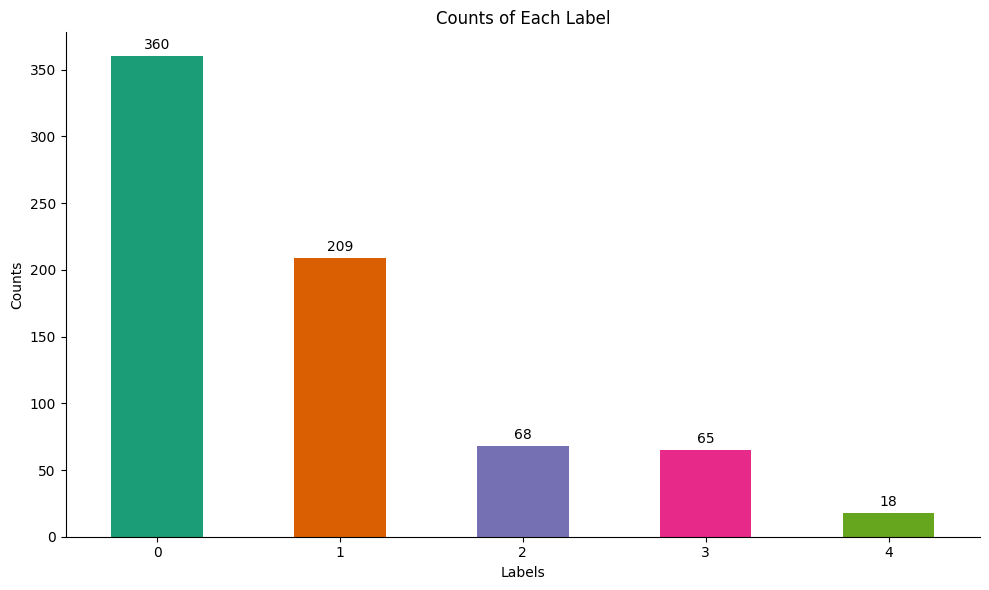

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = df['label'].value_counts().sort_index().plot(kind='bar', ax=ax, color=sns.color_palette('Dark2'))

# Add the number on top of each bar
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_height())}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Customize the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('Counts of Each Label')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

## Binary Label

In [ ]:
df.groupby('label_binary').size()

label_binary
0    360
1    360
dtype: int64

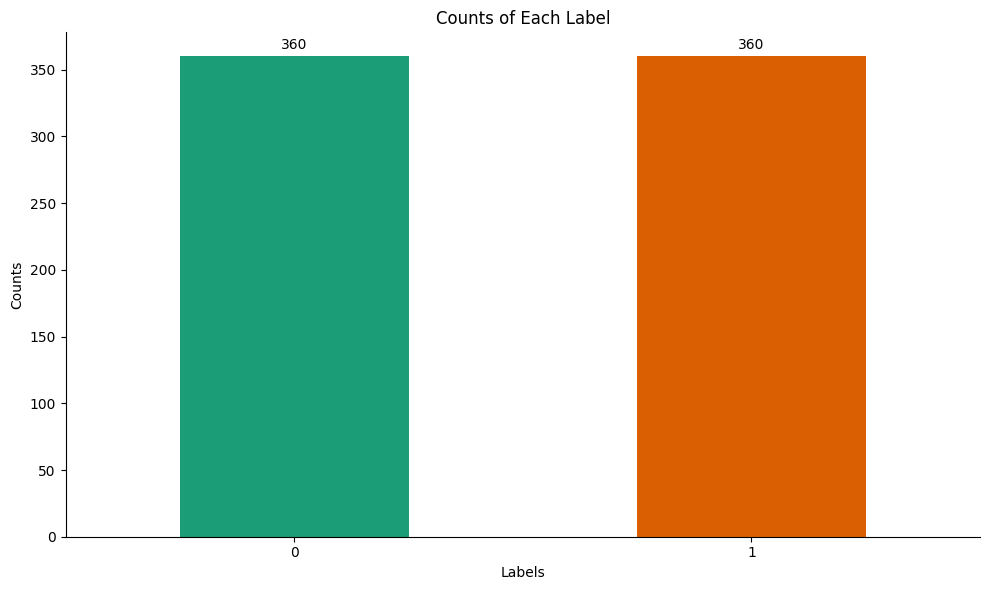

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = df['label_binary'].value_counts().sort_index().plot(kind='bar', ax=ax, color=sns.color_palette('Dark2'))

# Add the number on top of each bar
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_height())}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Customize the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('Counts of Each Label')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

# Count NULL values

In [ ]:
df.isnull().sum()

age               0
sex               0
cp                0
trestbps          3
chol             23
fbs              83
restecg           2
thalach           2
exang             2
oldpeak           6
slope           207
ca              413
thal            320
label             0
label_binary      0
dtype: int64

#The scenario where all of null values are removed

In [ ]:
df_rmvnull = df.dropna()

In [ ]:
df_rmvnull

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
3    42.0  1.0  3.0     130.0  180.0  0.0      0.0    150.0    0.0      0.0   
5    65.0  0.0  3.0     140.0  417.0  1.0      2.0    157.0    0.0      0.8   
8    37.0  0.0  3.0     120.0  215.0  0.0      0.0    170.0    0.0      0.0   
13   57.0  1.0  2.0     154.0  232.0  0.0      2.0    164.0    0.0      0.0   
14   51.0  1.0  3.0     100.0  222.0  0.0      0.0    143.0    1.0      1.2   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
709  41.0  1.0  4.0     110.0  172.0  0.0      2.0    158.0    0.0      0.0   
710  45.0  0.0  2.0     112.0  160.0  0.0      0.0    138.0    0.0      0.0   
713  52.0  1.0  4.0     125.0  212.0  0.0      0.0    168.0    0.0      1.0   
716  52.0  1.0  4.0     112.0  230.0  0.0      0.0    160.0    0.0      0.0   
718  65.0  1.0  4.0     120.0  177.0  0.0      0.0    140.0    0.0      0.4   

     slope   ca  thal  label  label_binary  
3      1.0  0.0   3.0      0             0  
5      1.0  1.0   3.0      0             0  
8      1.0  0.0   3.0      0             0  
13     1.0  1.0   3.0      1             1  
14     2.0  0.0   3.0      0             0  
..     ...  ...   ...    ...           ...  
709    1.0  0.0   7.0      1             1  
710    2.0  0.0   3.0      0             0  
713    1.0  2.0   7.0      3             1  
716    1.0  1.0   3.0      1             1  
718    1.0  0.0   7.0      0             0  

[298 rows x 15 columns]

In [ ]:
X = df_rmvnull.drop(['label','label_binary'], axis = 1)
y = df_rmvnull[['label','label_binary']]

## Plotting Result of Deletion

### Total number of each label (5 Labels)

In [ ]:
df_rmvnull.groupby('label').size()

label
0    160
1     55
2     35
3     35
4     13
dtype: int64

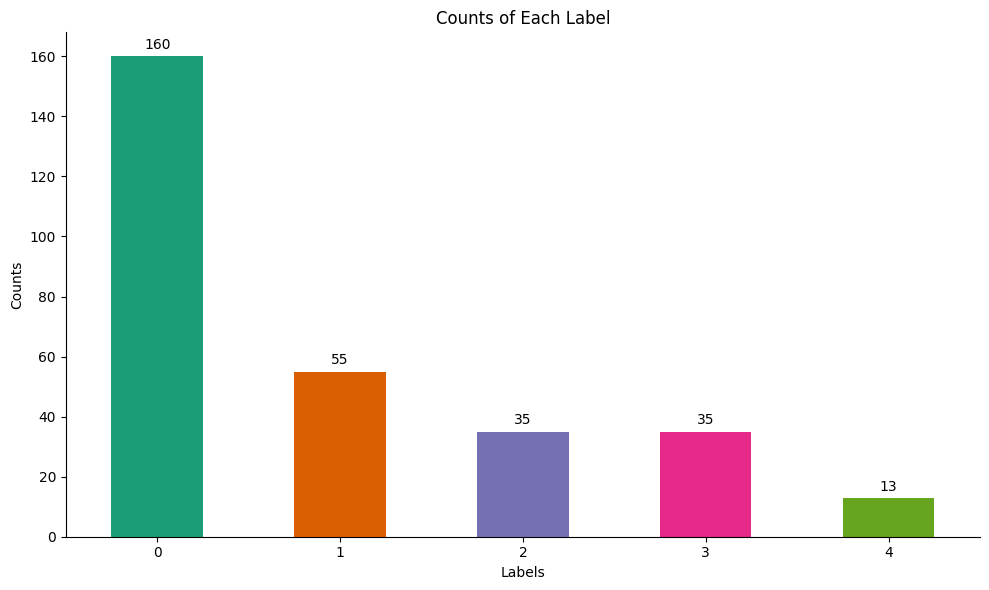

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = df_rmvnull['label'].value_counts().sort_index().plot(kind='bar', ax=ax, color=sns.color_palette('Dark2'))

# Add the number on top of each bar
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_height())}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Customize the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('Counts of Each Label')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

### Binary Label

In [ ]:
df_rmvnull.groupby('label_binary').size()

label_binary
0    160
1    138
dtype: int64

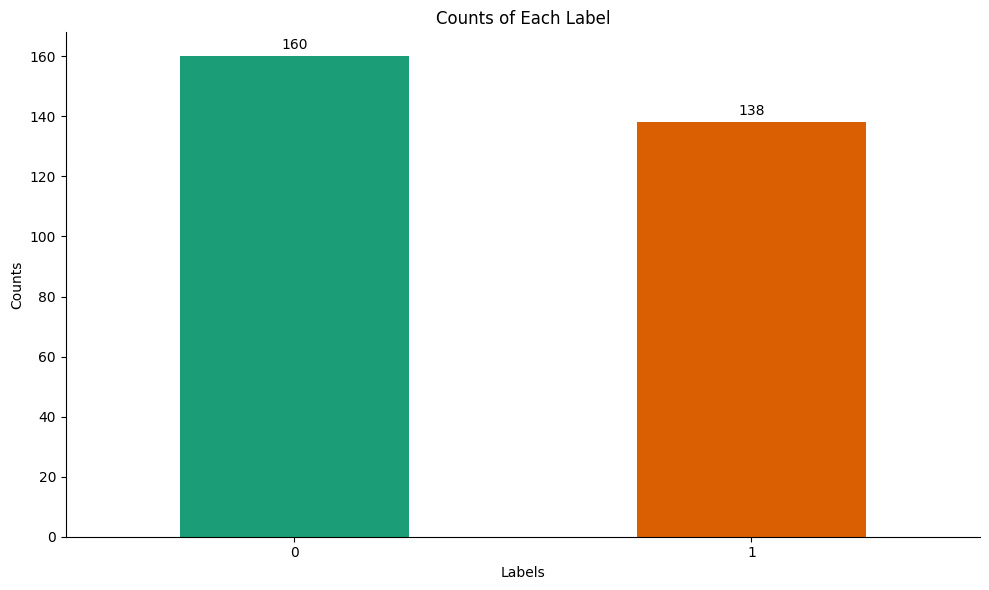

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = df_rmvnull['label_binary'].value_counts().sort_index().plot(kind='bar', ax=ax, color=sns.color_palette('Dark2'))

# Add the number on top of each bar
for bar in bars.patches:
    ax.annotate(f'{int(bar.get_height())}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Customize the plot
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Labels')
ax.set_ylabel('Counts')
ax.set_title('Counts of Each Label')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model: 5 Label

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

nb = GaussianNB().fit(X_train, y_train['label'])
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train['label'])
svm = SVC(probability=True, random_state=42).fit(X_train, y_train['label'])
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42).fit(X_train, y_train['label'])

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble model
ensemble = VotingClassifier(
    estimators=[('nb', nb), ('rf', rf), ('svm', svm), ('xgb', xgb_model)],
    voting='soft'
)
ensemble.fit(X_train, y_train['label'])

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test['label'], y_pred)
f1 = f1_score(y_test['label'], y_pred, average='macro')
recall = recall_score(y_test['label'], y_pred, average='macro')
precision = precision_score(y_test['label'], y_pred, average='macro')

# Print metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')


Test Accuracy: 0.5667
F1 Score: 0.2681
Recall: 0.3043
Precision: 0.2516


## Model: Binary Label

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

nb = GaussianNB().fit(X_train, y_train['label_binary'])
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train['label_binary'])
svm = SVC(probability=True, random_state=42).fit(X_train, y_train['label_binary'])
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42).fit(X_train, y_train['label_binary'])

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble model
ensemble = VotingClassifier(
    estimators=[('nb', nb), ('rf', rf), ('svm', svm), ('xgb', xgb_model)],
    voting='soft'
)
ensemble.fit(X_train, y_train['label_binary'])

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

## Result

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test['label_binary'], y_pred)
f1 = f1_score(y_test['label_binary'], y_pred, average='macro')
recall = recall_score(y_test['label_binary'], y_pred, average='macro')
precision = precision_score(y_test['label_binary'], y_pred, average='macro')

# Print metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')


Test Accuracy: 0.8333
F1 Score: 0.8333
Recall: 0.8354
Precision: 0.8348


#The scenario where all of null values are filled with mean

In [ ]:
mean_values = df.mean()
df_mean = df.fillna(mean_values)

In [ ]:
df_mean

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    50.0  1.0  4.0     120.0    0.0  0.0      1.0    156.0    1.0      0.0   
1    58.0  1.0  3.0     130.0  213.0  0.0      1.0    140.0    0.0      0.0   
2    54.0  0.0  2.0     120.0  230.0  1.0      0.0    140.0    0.0      0.0   
3    42.0  1.0  3.0     130.0  180.0  0.0      0.0    150.0    0.0      0.0   
4    41.0  1.0  4.0     110.0  289.0  0.0      0.0    170.0    0.0      0.0   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
715  56.0  1.0  2.0     130.0  184.0  0.0      0.0    100.0    0.0      0.0   
716  52.0  1.0  4.0     112.0  230.0  0.0      0.0    160.0    0.0      0.0   
717  54.0  1.0  4.0     140.0  216.0  0.0      0.0    105.0    0.0      1.5   
718  65.0  1.0  4.0     120.0  177.0  0.0      0.0    140.0    0.0      0.4   
719  54.0  0.0  2.0     120.0  273.0  0.0      0.0    150.0    0.0      1.5   

        slope        ca   thal  label  label_binary  
0    1.000000  0.680782  6.000      3             1  
1    1.701754  0.680782  6.000      1             1  
2    1.701754  0.680782  4.985      0             0  
3    1.000000  0.000000  3.000      0             0  
4    1.701754  0.680782  6.000      1             1  
..        ...       ...    ...    ...           ...  
715  1.701754  0.680782  4.985      0             0  
716  1.000000  1.000000  3.000      1             1  
717  2.000000  0.680782  4.985      1             1  
718  1.000000  0.000000  7.000      0             0  
719  2.000000  0.680782  4.985      0             0  

[720 rows x 15 columns]

## Train Test Split

In [ ]:
X = df_mean.drop(['label','label_binary'], axis = 1)
y = df_mean[['label','label_binary']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model: 5 Label

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

nb = GaussianNB().fit(X_train, y_train['label'])
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train['label'])
svm = SVC(probability=True, random_state=42).fit(X_train, y_train['label'])
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42).fit(X_train, y_train['label'])

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble model
ensemble = VotingClassifier(
    estimators=[('nb', nb), ('rf', rf), ('svm', svm), ('xgb', xgb_model)],
    voting='soft'
)
ensemble.fit(X_train, y_train['label'])

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test['label'], y_pred)
f1 = f1_score(y_test['label'], y_pred, average='macro')
recall = recall_score(y_test['label'], y_pred, average='macro')
precision = precision_score(y_test['label'], y_pred, average='macro')

# Print metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')


Test Accuracy: 0.6250
F1 Score: 0.3506
Recall: 0.3543
Precision: 0.3869


## Model: Binary Label

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

nb = GaussianNB().fit(X_train, y_train['label_binary'])
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train['label_binary'])
svm = SVC(probability=True, random_state=42).fit(X_train, y_train['label_binary'])
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42).fit(X_train, y_train['label_binary'])

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble model
ensemble = VotingClassifier(
    estimators=[('nb', nb), ('rf', rf), ('svm', svm), ('xgb', xgb_model)],
    voting='soft'
)
ensemble.fit(X_train, y_train['label_binary'])

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

## Result

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test['label_binary'], y_pred)
f1 = f1_score(y_test['label_binary'], y_pred, average='macro')
recall = recall_score(y_test['label_binary'], y_pred, average='macro')
precision = precision_score(y_test['label_binary'], y_pred, average='macro')

# Print metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')


Test Accuracy: 0.8287
F1 Score: 0.8287
Recall: 0.8315
Precision: 0.8319


# Using Safe-Region Imputation to handle null values

## Safe-Region Imputation Algorithm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

def distance_complete(instance1, instance2):
    mask = ~np.isnan(instance1)
    return np.sqrt(np.sum((instance1[mask] - instance2[mask]) ** 2))

def distance_incomplete(instance1, instance2):
    mask = ~np.isnan(instance1)
    return np.sqrt(np.sum((instance1[mask] - instance2[mask]) ** 2))

def get_shortest(distances, k):
    return np.argsort(distances)[:k]

def safe_region_imputation(df, k=5):
    # Separate complete and incomplete instances
    complete_instances = df.dropna().values
    incomplete_instances = df[df.isnull().any(axis=1)].values
    imputed_instances = incomplete_instances.copy()

    # Calculate minimal distance for each pair of complete instances
    n_complete = len(complete_instances)
    distances = np.zeros((n_complete, n_complete))
    for i in range(n_complete):
        for j in range(n_complete):
            if i != j:
                distances[i, j] = distance_complete(complete_instances[i], complete_instances[j])

    # Identify the k-nearest neighbors for each complete instance
    k_nearest_indices = np.argsort(distances, axis=1)[:, :k]

    # Impute missing values in incomplete instances
    for i in range(len(incomplete_instances)):
        min_dis = None
        min_index = None
        for j in range(len(complete_instances)):
            i_dis = distance_incomplete(incomplete_instances[i], complete_instances[j])
            if min_dis is None or i_dis < min_dis:
                min_dis = i_dis
                min_index = j

        for th in np.arange(0.01, 3.01, 0.01):
            for a in range(df.shape[1]):
                if np.isnan(incomplete_instances[i, a]):
                    score = 0
                    values = []
                    for j in k_nearest_indices[min_index]:
                        if complete_instances[j, a] < th:
                            score += 1
                            values.append(complete_instances[j, a])

                    if score > 0:
                        new_val = np.mean(values)
                        imputed_instances[i, a] = new_val

    # Update the dataframe with imputed values
    df.loc[df.isnull().any(axis=1)] = imputed_instances

    # Fallback to mean imputation for any remaining missing values
    df.fillna(df.mean(), inplace=True)

    return df

df_imputed = safe_region_imputation(df, k=2)

In [ ]:
df_imputed[df_imputed.isnull().any(axis=1)]

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, label, label_binary]
Index: []

In [ ]:
df = df_imputed

In [ ]:
df['label_binary'] = df['label'].apply(lambda x: 1 if x > 0 else 0)

## Train Test Split

In [ ]:
X = df.drop(['label','label_binary'], axis = 1)
y = df[['label','label_binary']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model: 5 Label

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

nb = GaussianNB().fit(X_train, y_train['label'])
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train['label'])
svm = SVC(probability=True, random_state=42).fit(X_train, y_train['label'])
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42).fit(X_train, y_train['label'])

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble model
ensemble = VotingClassifier(
    estimators=[('nb', nb), ('rf', rf), ('svm', svm), ('xgb', xgb_model)],
    voting='soft'
)
ensemble.fit(X_train, y_train['label'])

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test['label'], y_pred)
f1 = f1_score(y_test['label'], y_pred, average='macro')
recall = recall_score(y_test['label'], y_pred, average='macro')
precision = precision_score(y_test['label'], y_pred, average='macro')

# Print metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')


Test Accuracy: 0.5926
F1 Score: 0.3091
Recall: 0.3183
Precision: 0.3184


## Model: Binary Label

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

nb = GaussianNB().fit(X_train, y_train['label_binary'])
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train['label_binary'])
svm = SVC(probability=True, random_state=42).fit(X_train, y_train['label_binary'])
xgb_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42).fit(X_train, y_train['label_binary'])

In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble model
ensemble = VotingClassifier(
    estimators=[('nb', nb), ('rf', rf), ('svm', svm), ('xgb', xgb_model)],
    voting='soft'
)
ensemble.fit(X_train, y_train['label_binary'])

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

## Result

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test['label_binary'], y_pred)
f1 = f1_score(y_test['label_binary'], y_pred, average='macro')
recall = recall_score(y_test['label_binary'], y_pred, average='macro')
precision = precision_score(y_test['label_binary'], y_pred, average='macro')

# Print metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')


Test Accuracy: 0.8380
F1 Score: 0.8380
Recall: 0.8403
Precision: 0.8400


# Data Exploration

## Correlation Matrix

### 5 label

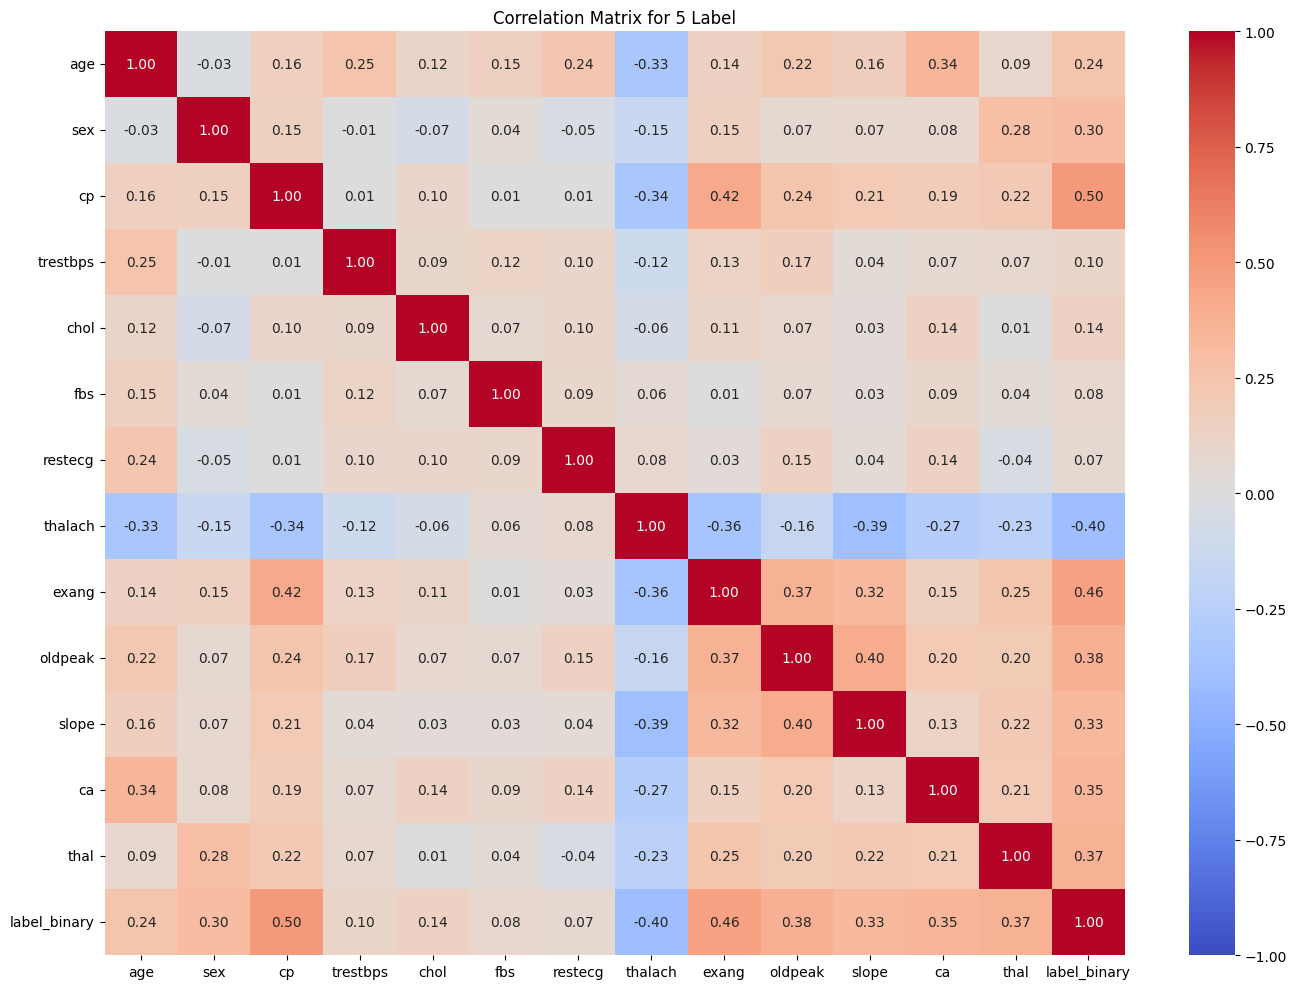

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Calculate the correlation matrix including 'label_binary'
correlation_matrix_binary = df.drop('label', axis=1).corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_binary, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix for 5 Label')
plt.tight_layout()
plt.show()


### Binary Label

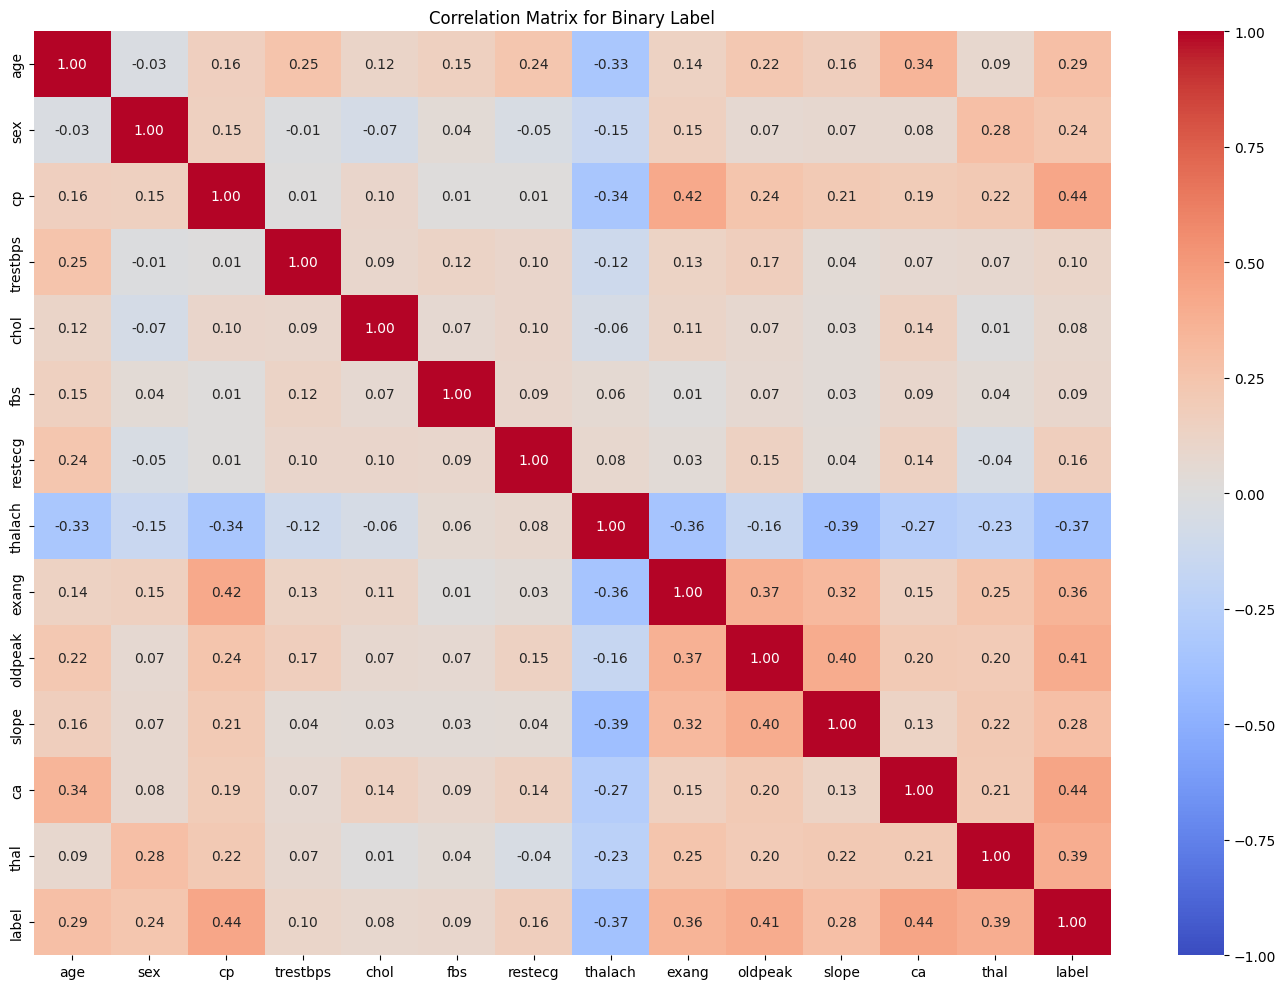

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe

# Calculate the correlation matrix including 'label_binary'
correlation_matrix_5label = df.drop('label_binary', axis=1).corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_5label, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix for Binary Label')
plt.tight_layout()
plt.show()


## Top 10 Features Count (with Heart Disease)

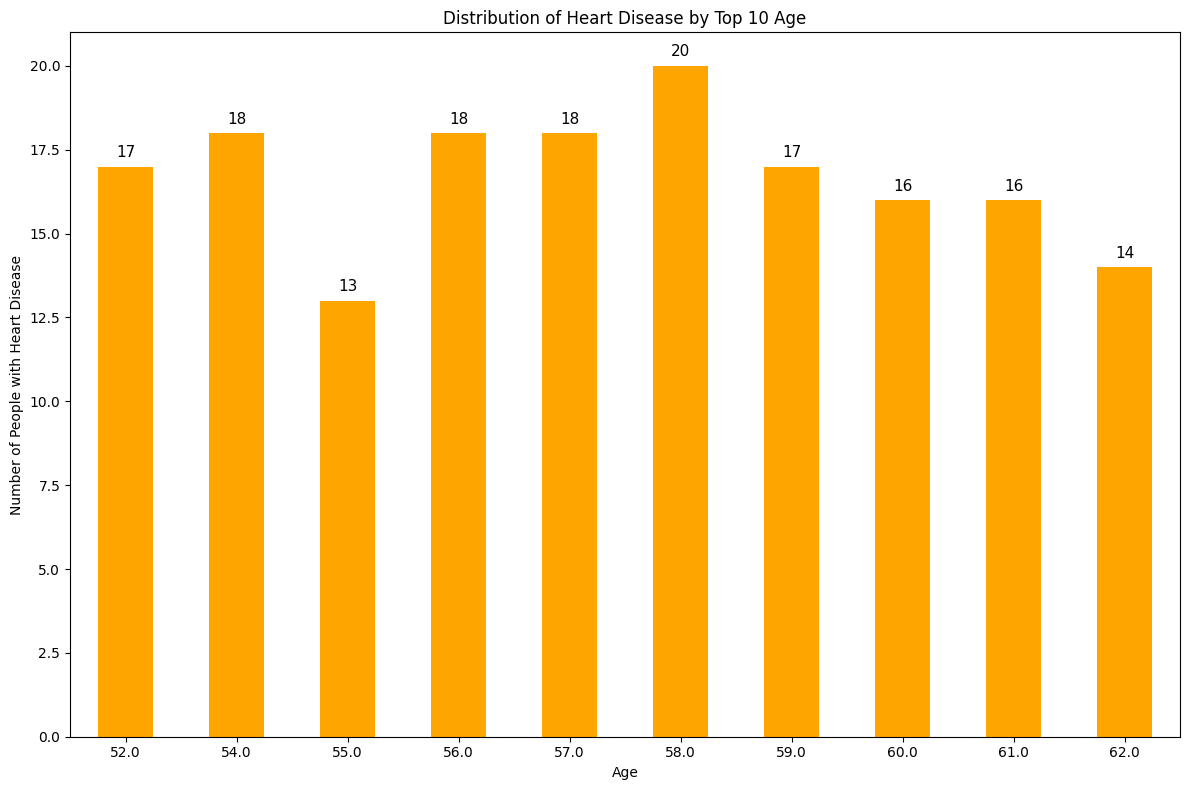

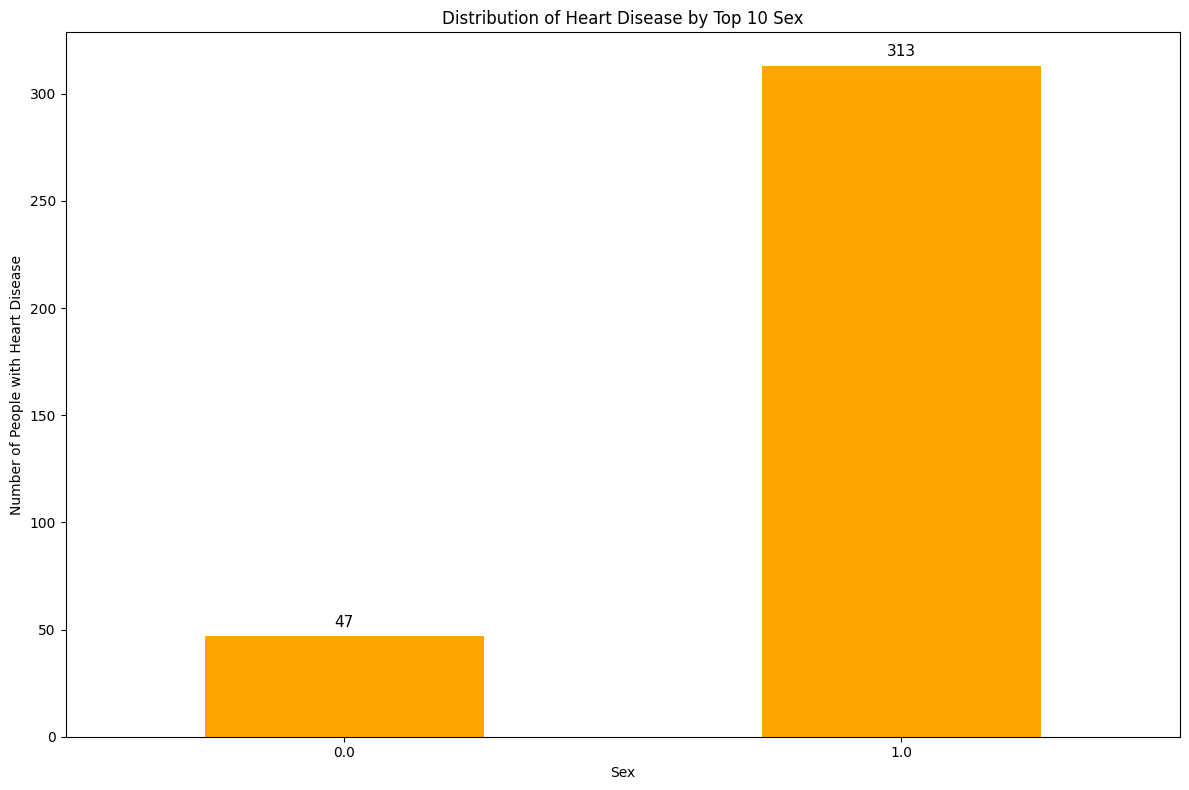

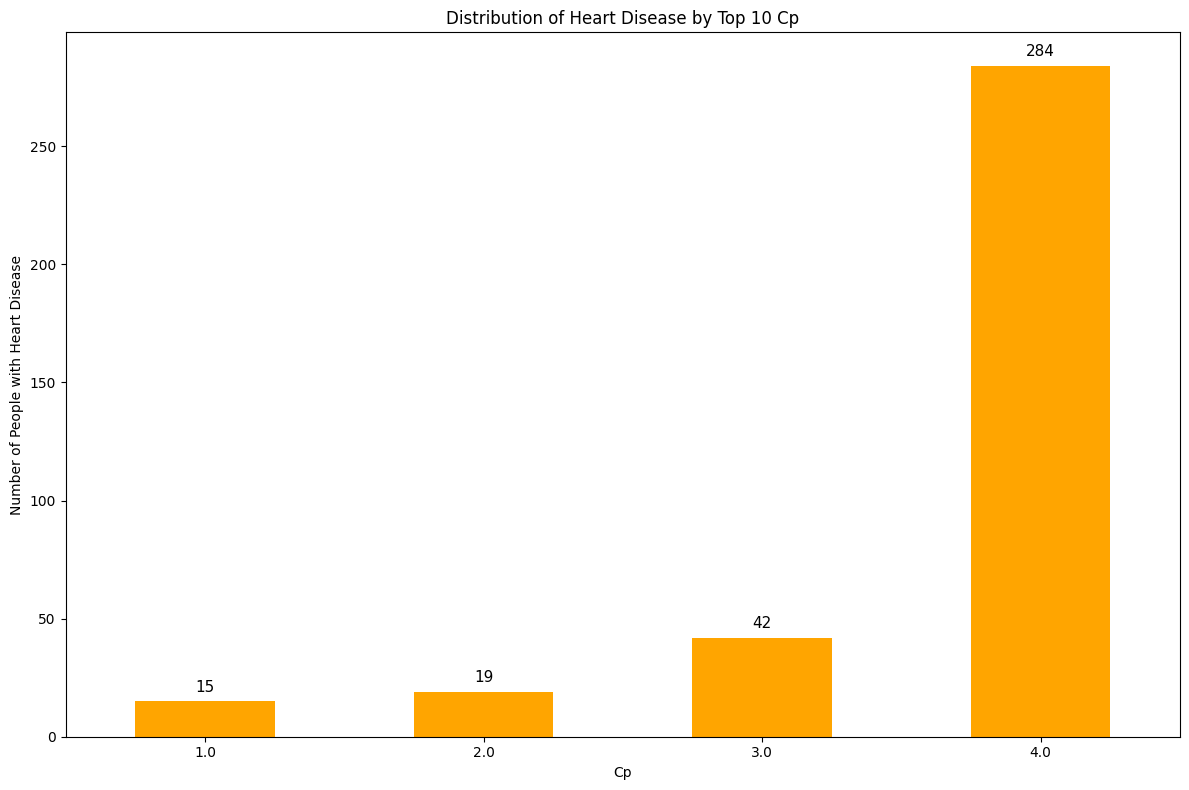

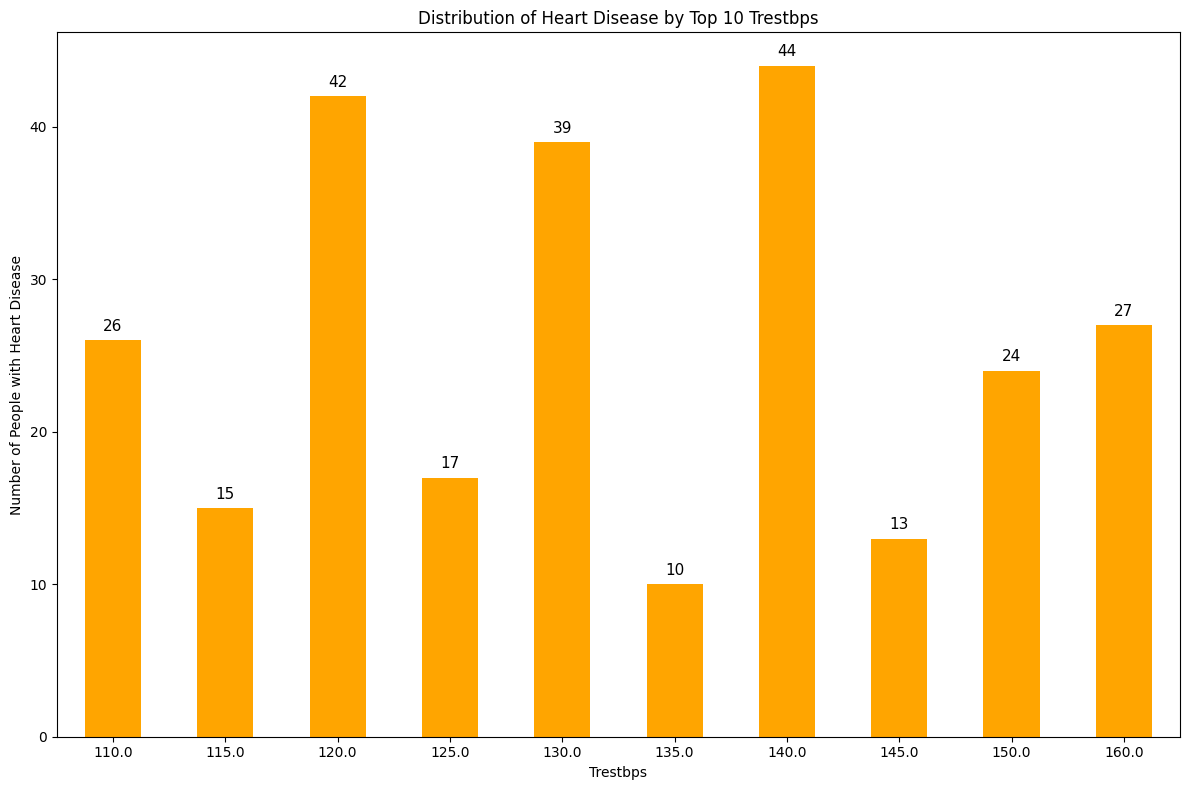

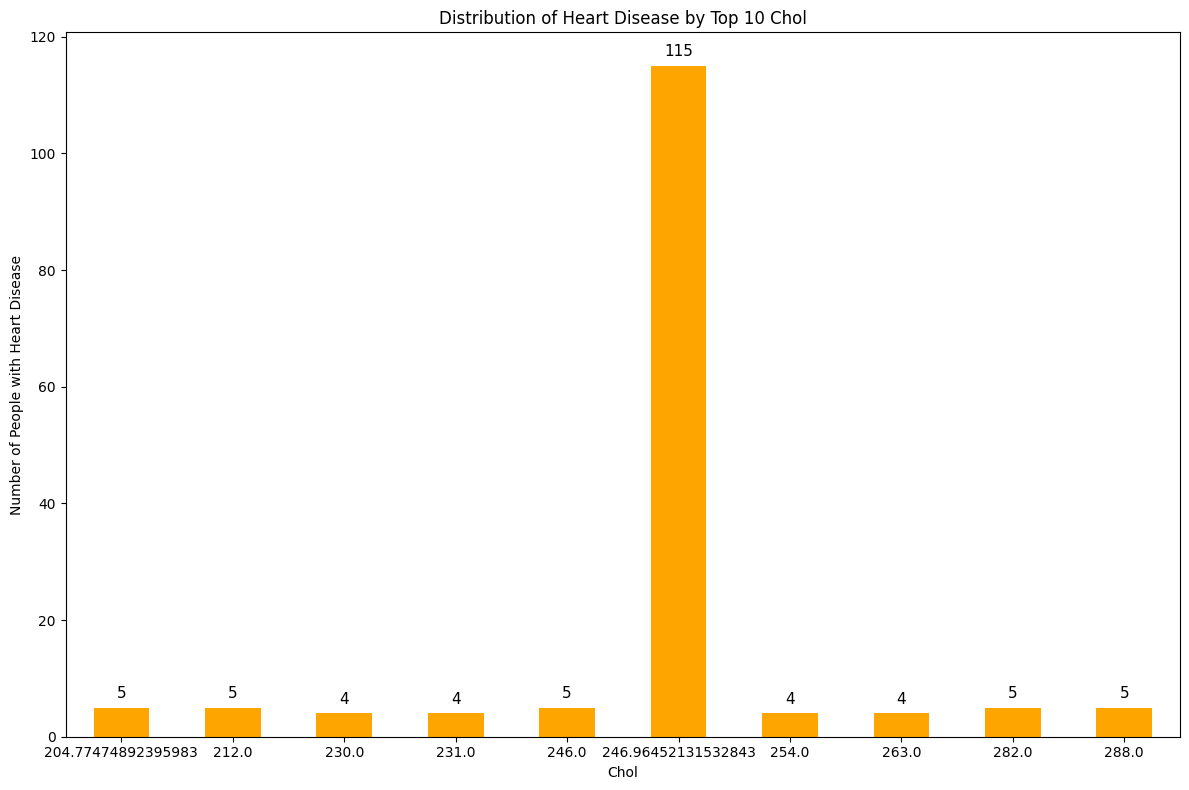

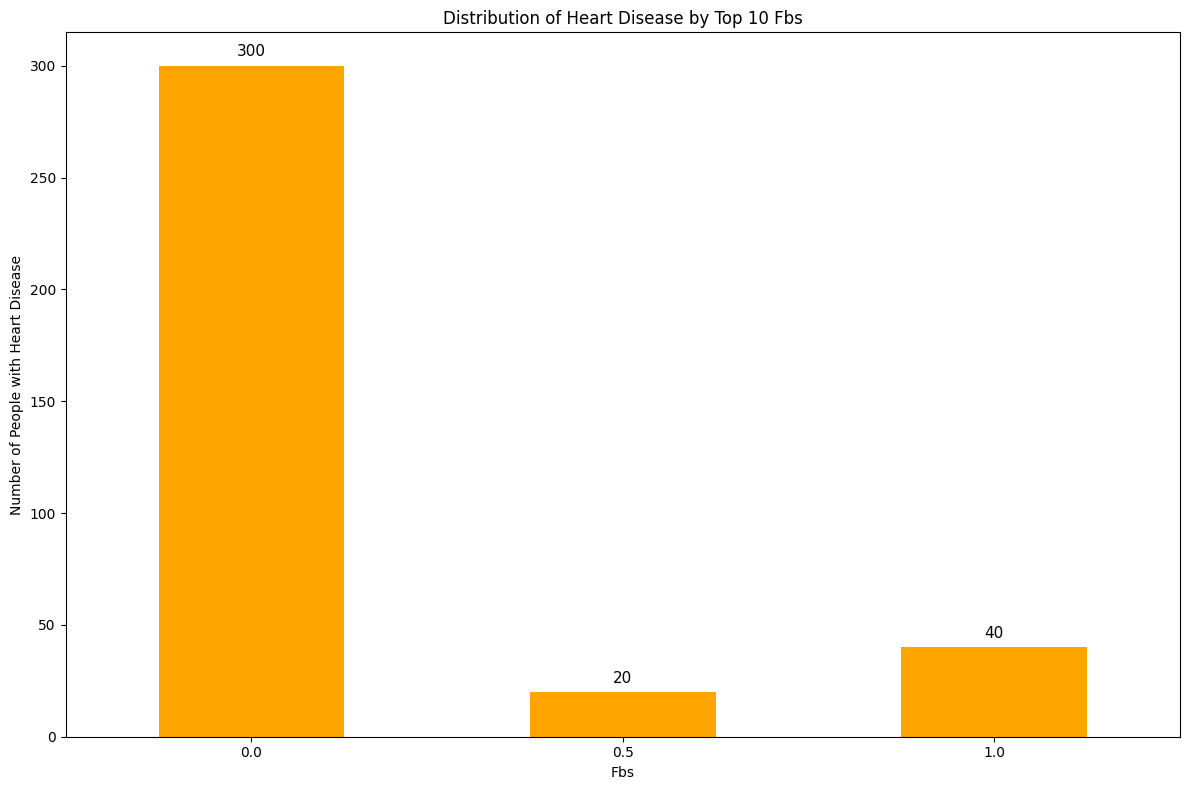

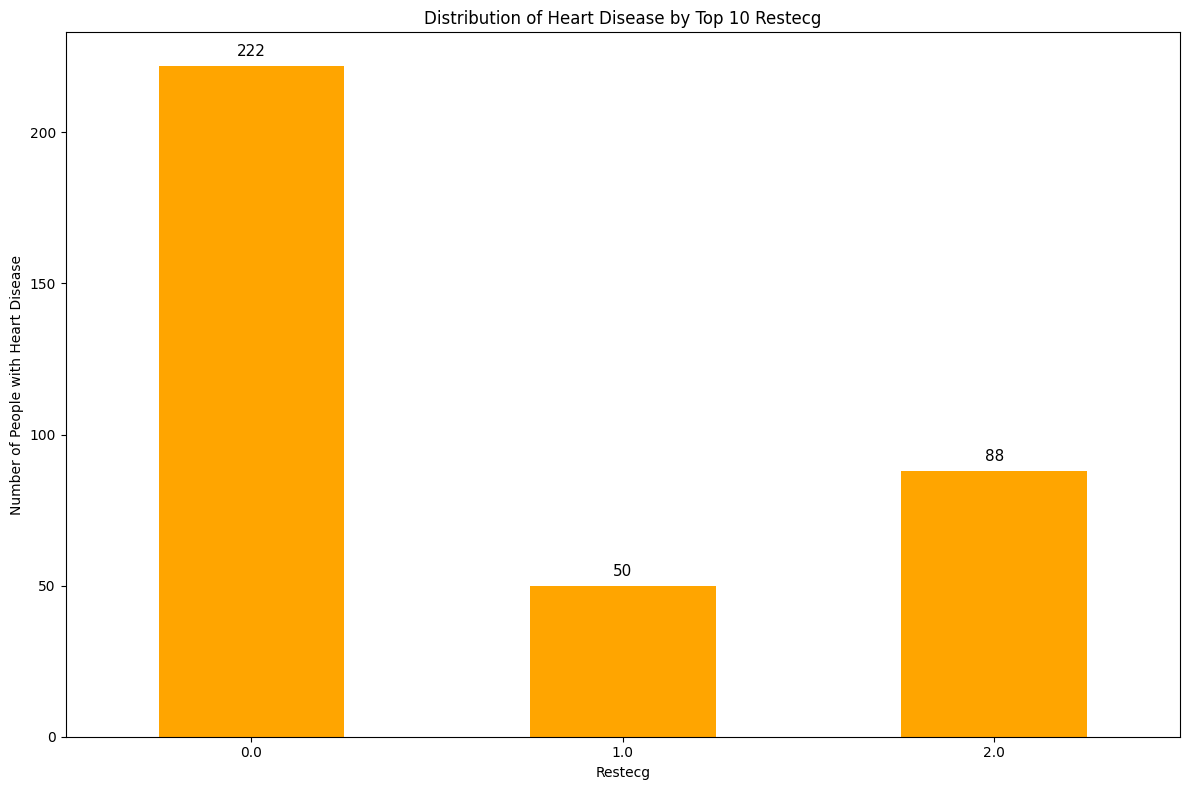

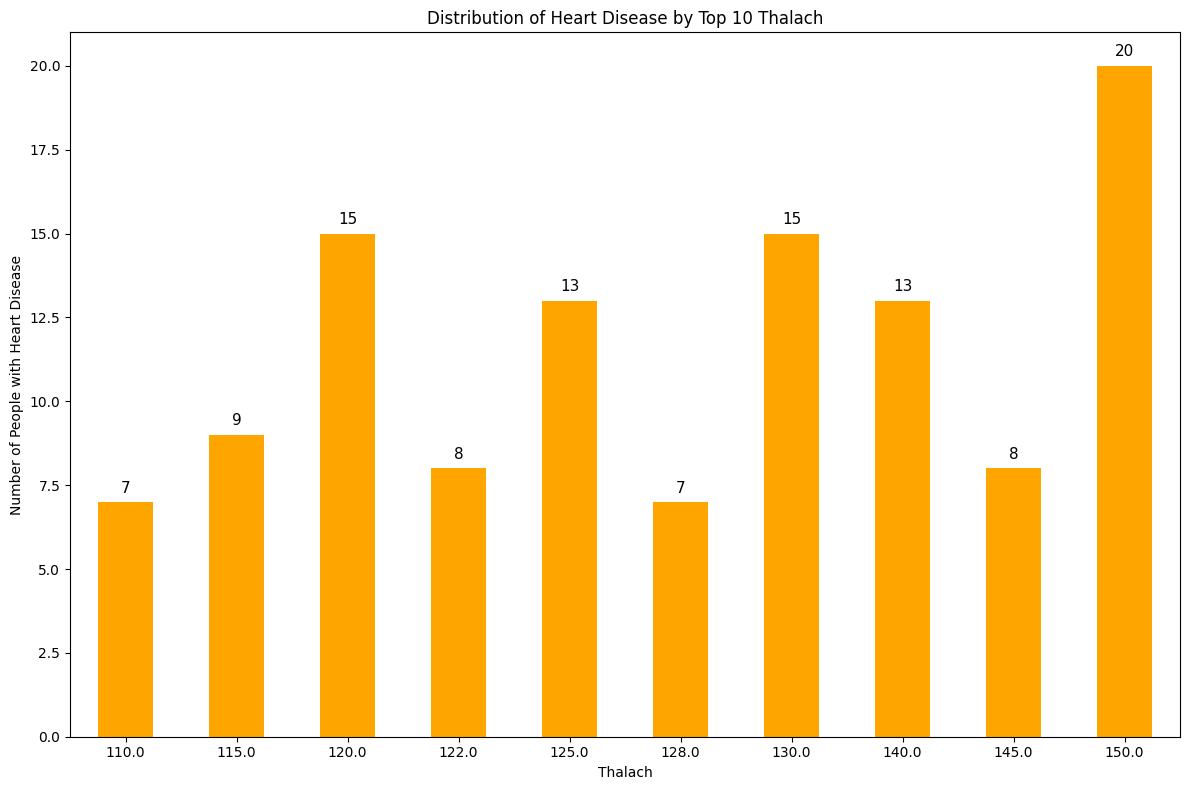

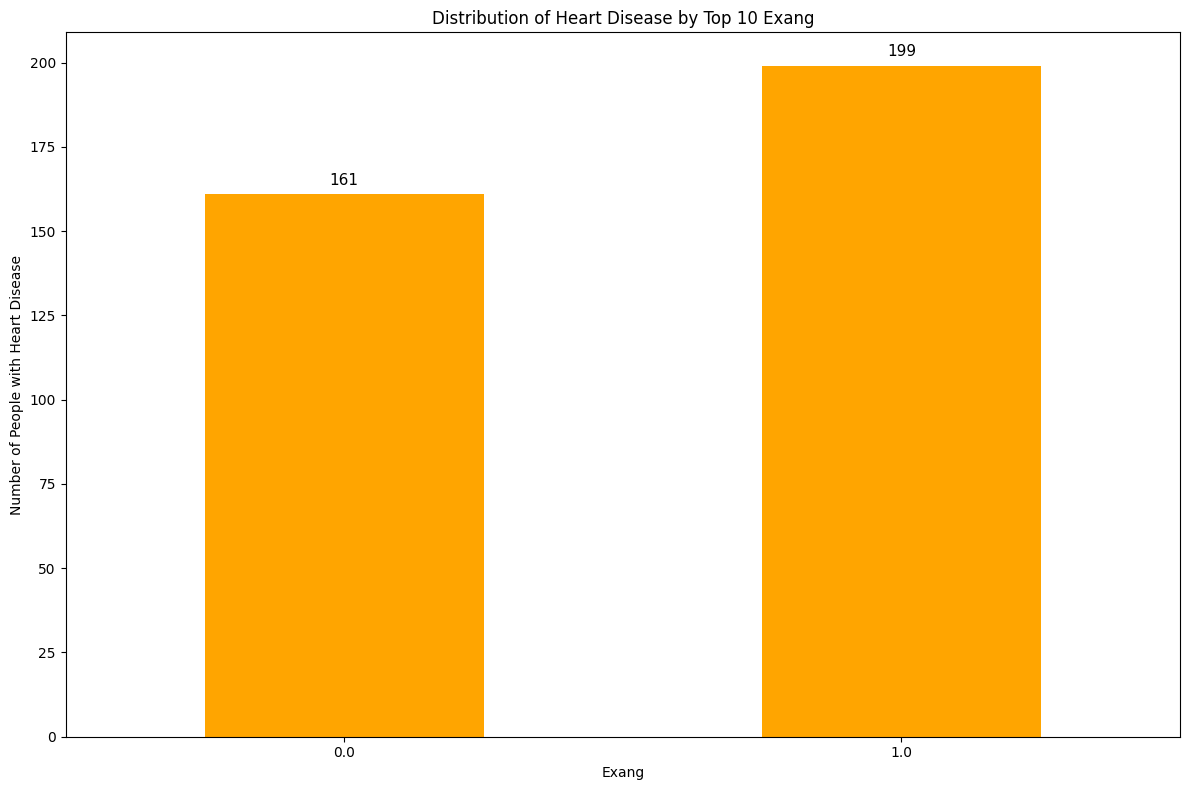

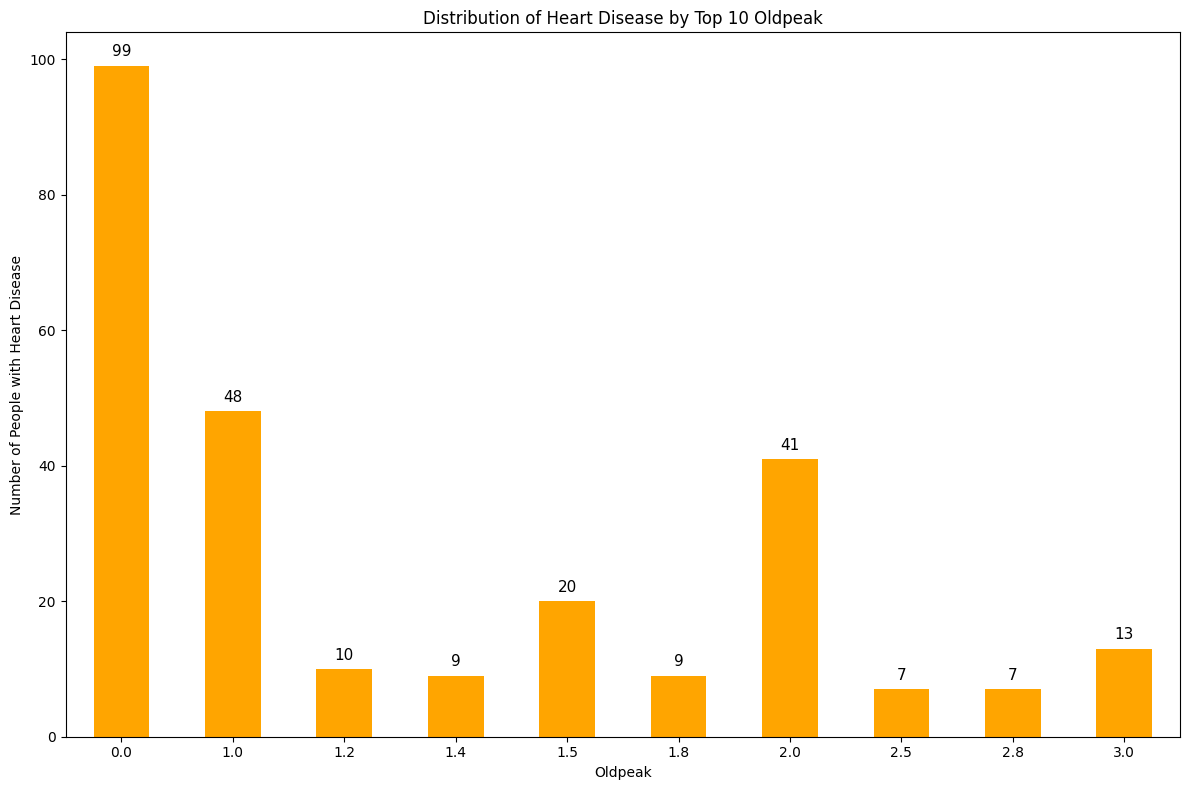

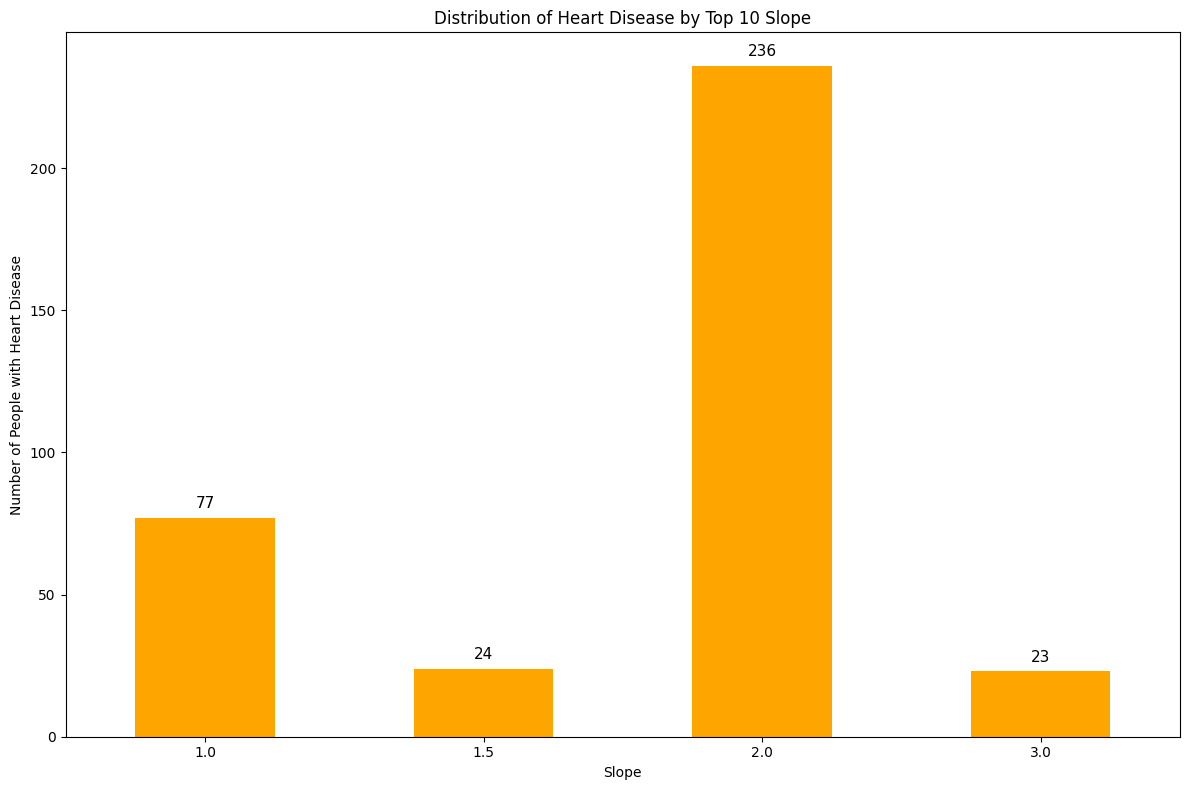

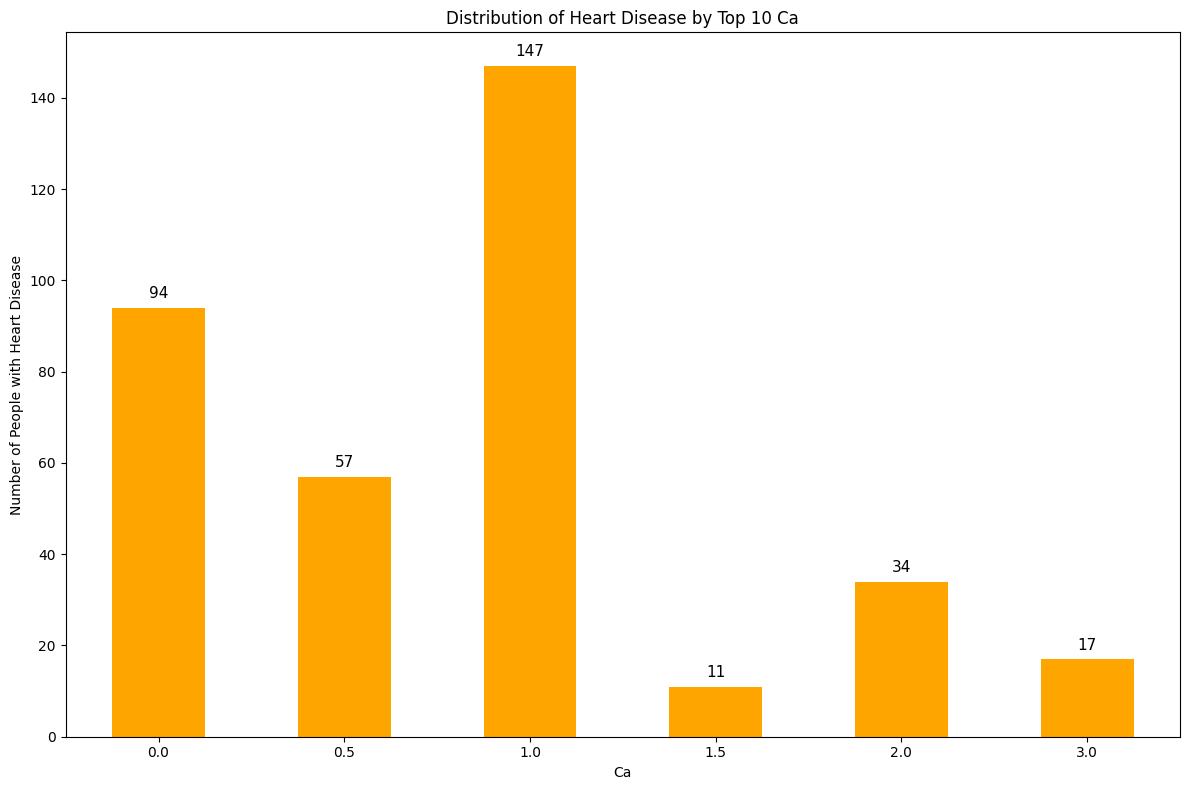

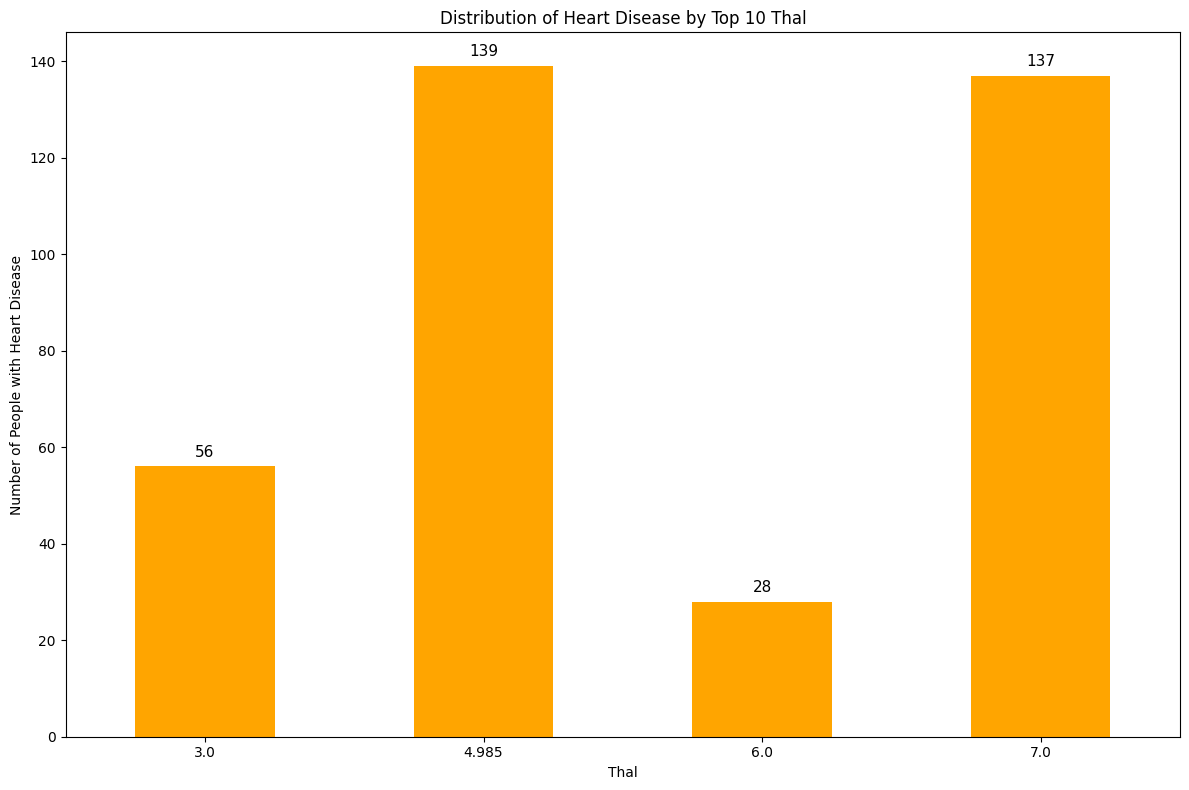

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe
# Example data for demonstration purposes
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset path

# Set cholesterol values of 0 to NaN
df.loc[df['chol'] == 0, 'chol'] = np.nan

# Filter the dataframe for people with heart disease
heart_disease_df = df[df['label_binary'] == 1]

# List of features to plot
features = df.drop(['label', 'label_binary'], axis=1).columns

# Plotting the distribution for each feature
for feature in features:
    # Get the top 10 values for the feature with the highest counts of heart disease
    top_10_values = heart_disease_df[feature].value_counts().head(10).index

    # Filter the dataframe to include only the top 10 values
    top_10_value_df = heart_disease_df[heart_disease_df[feature].isin(top_10_values)]

    # Plot the distribution of heart disease by top 10 values for the feature
    plt.figure(figsize=(12, 8))
    value_counts = top_10_value_df[feature].value_counts().sort_index()
    ax = value_counts.plot(kind='bar', color='orange')

    # Add counts on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                    textcoords='offset points')

    plt.title(f'Distribution of Heart Disease by Top 10 {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Number of People with Heart Disease')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()


## Top 10 Features Count (No Heart Disease)

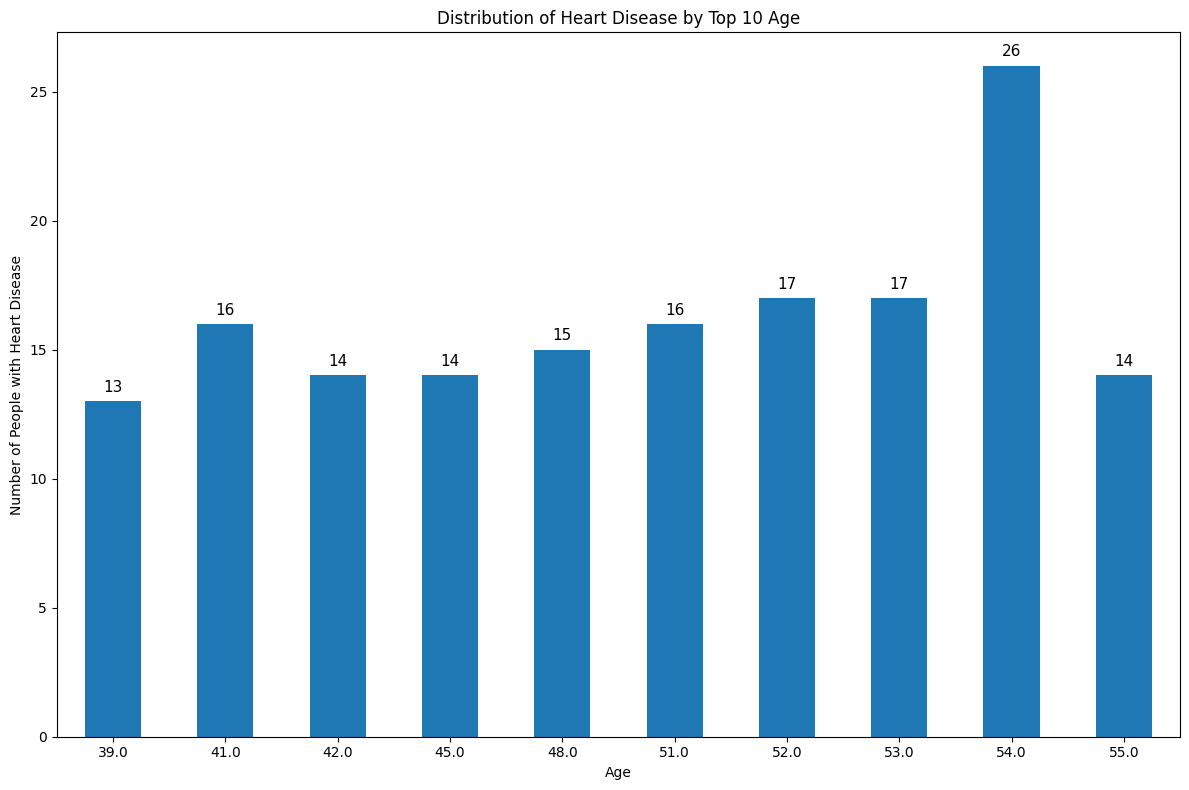

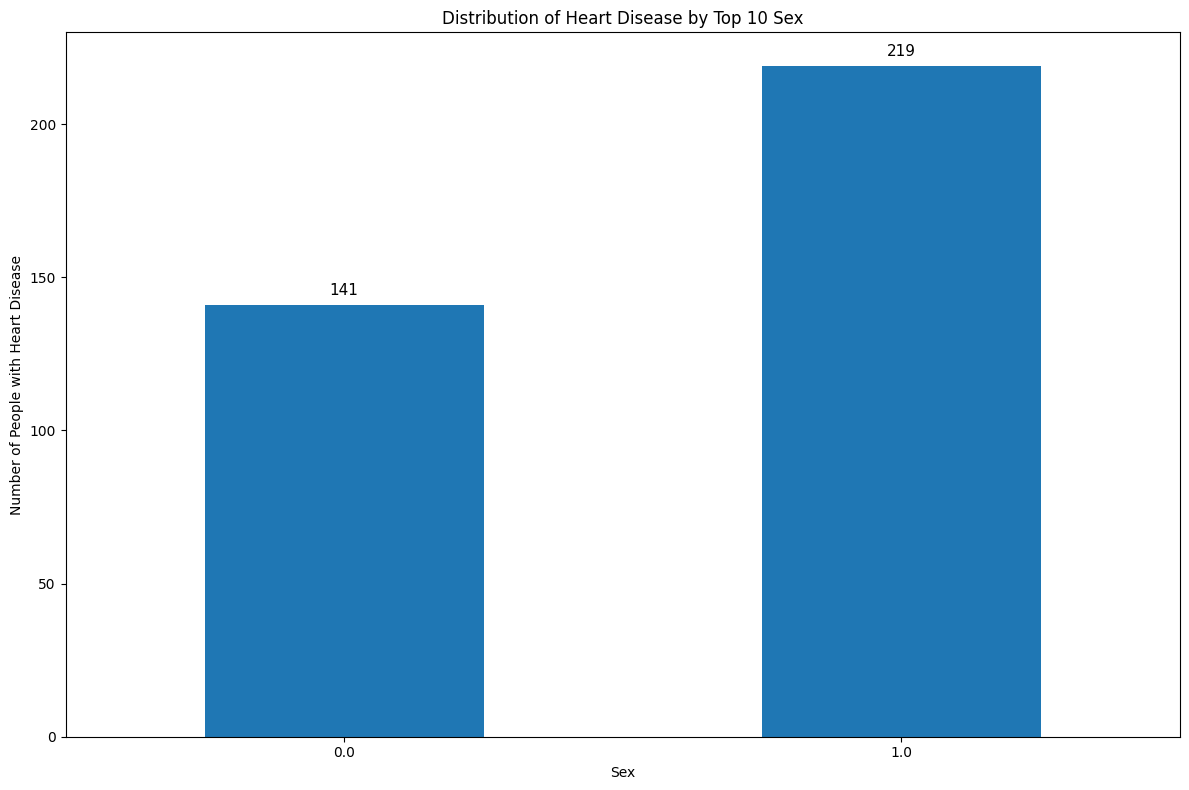

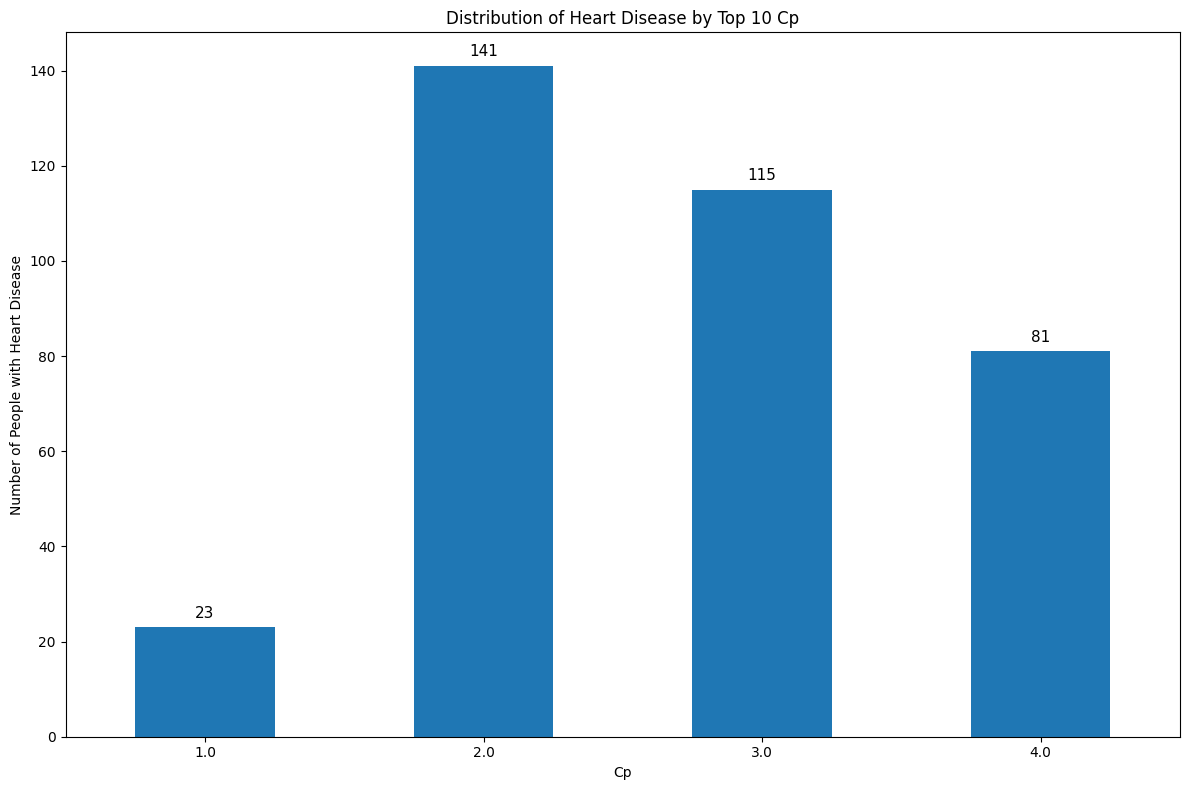

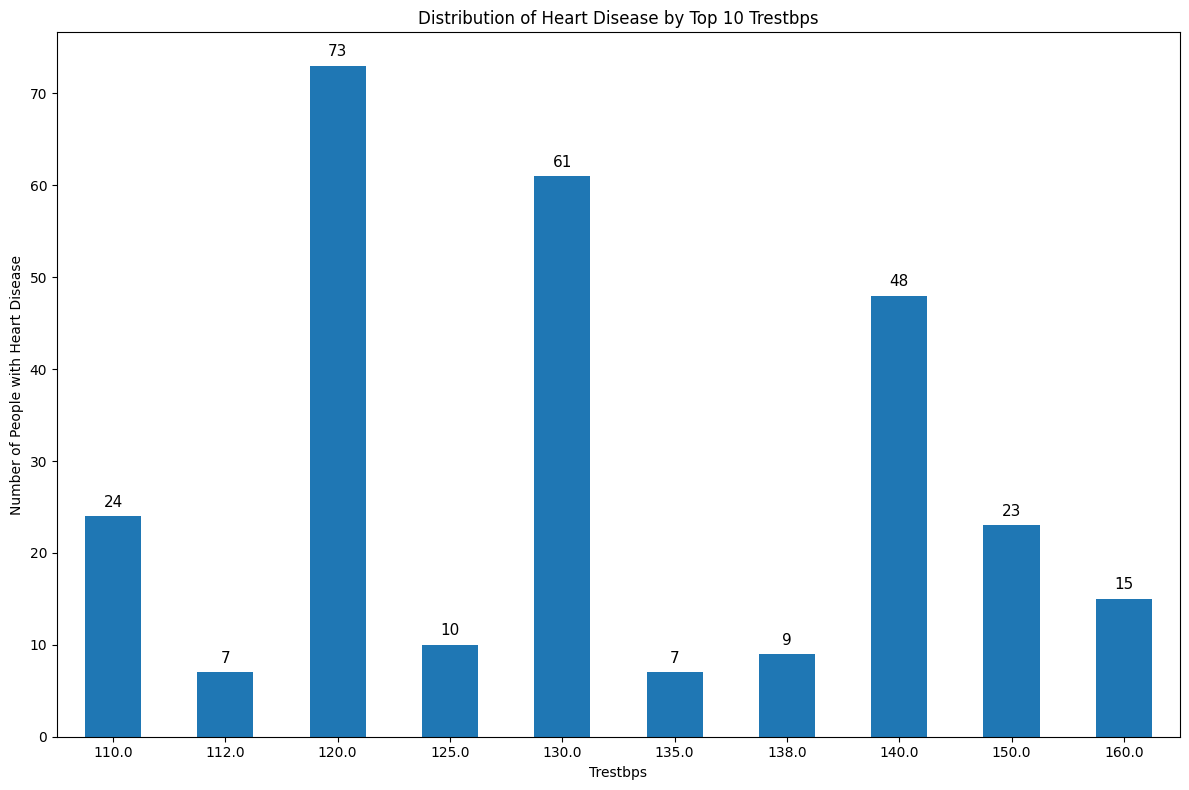

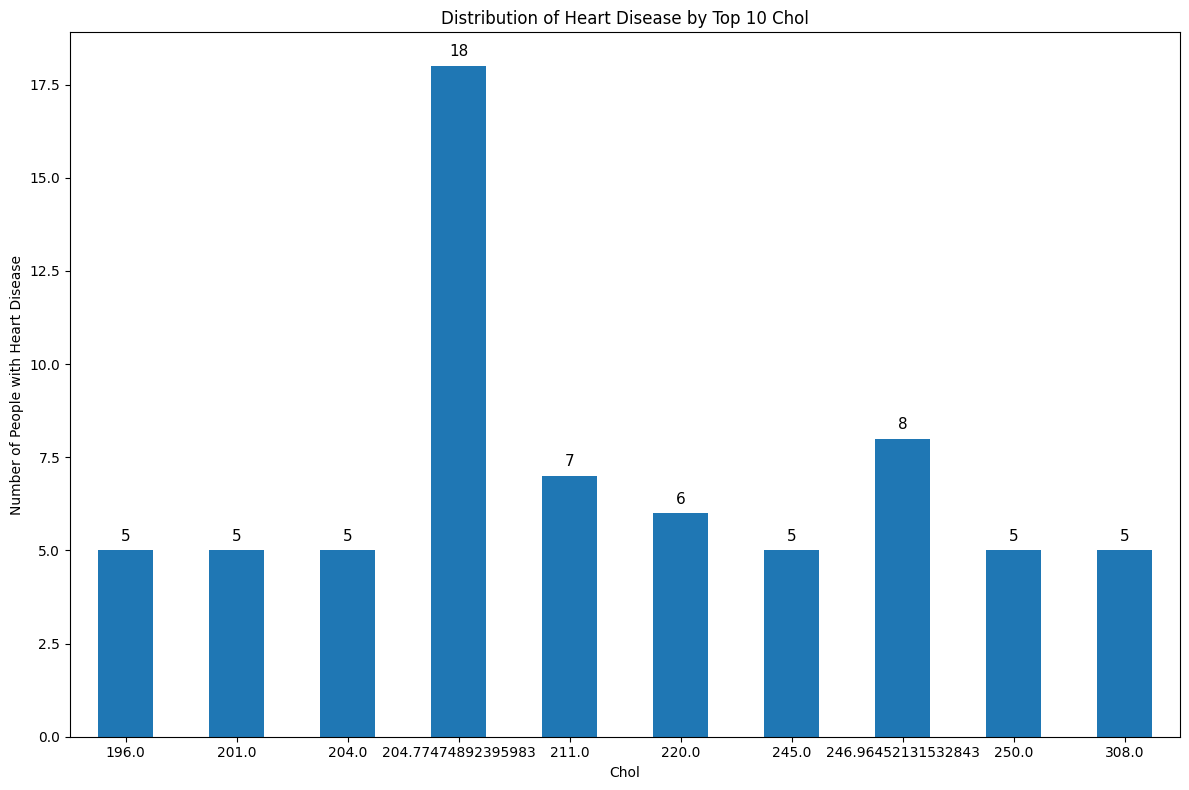

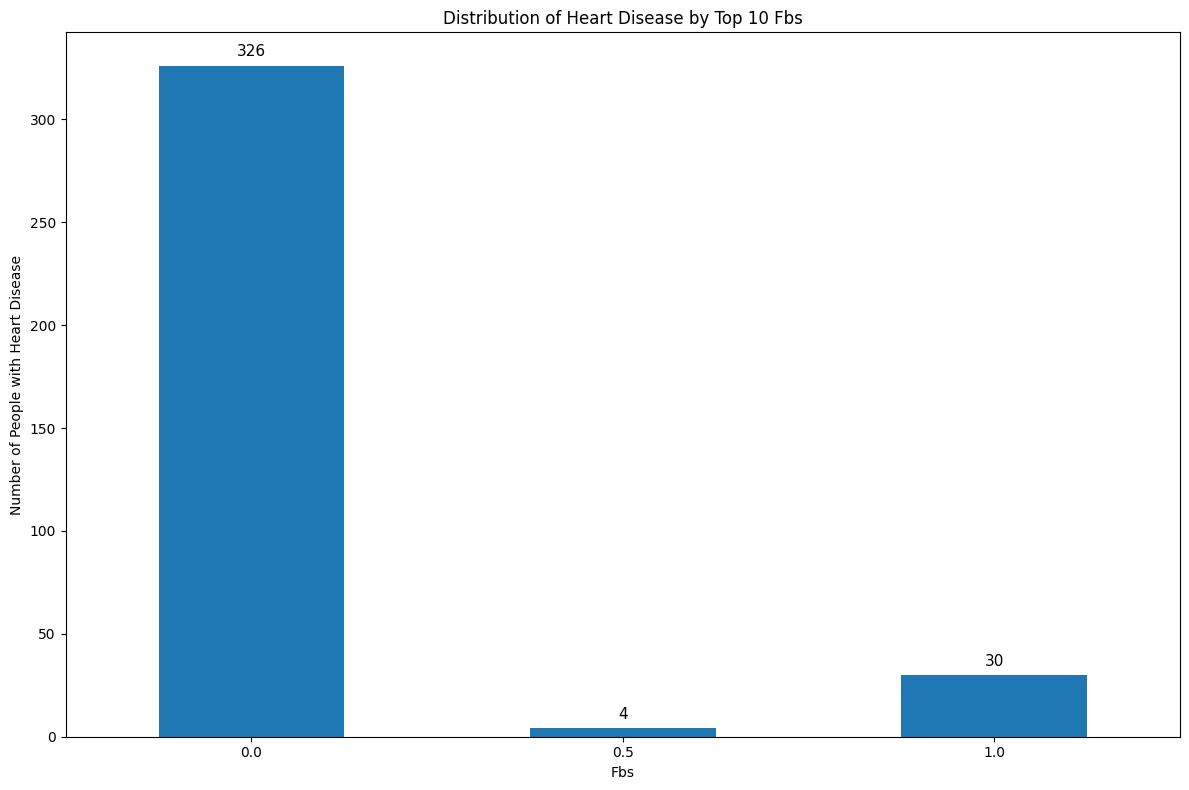

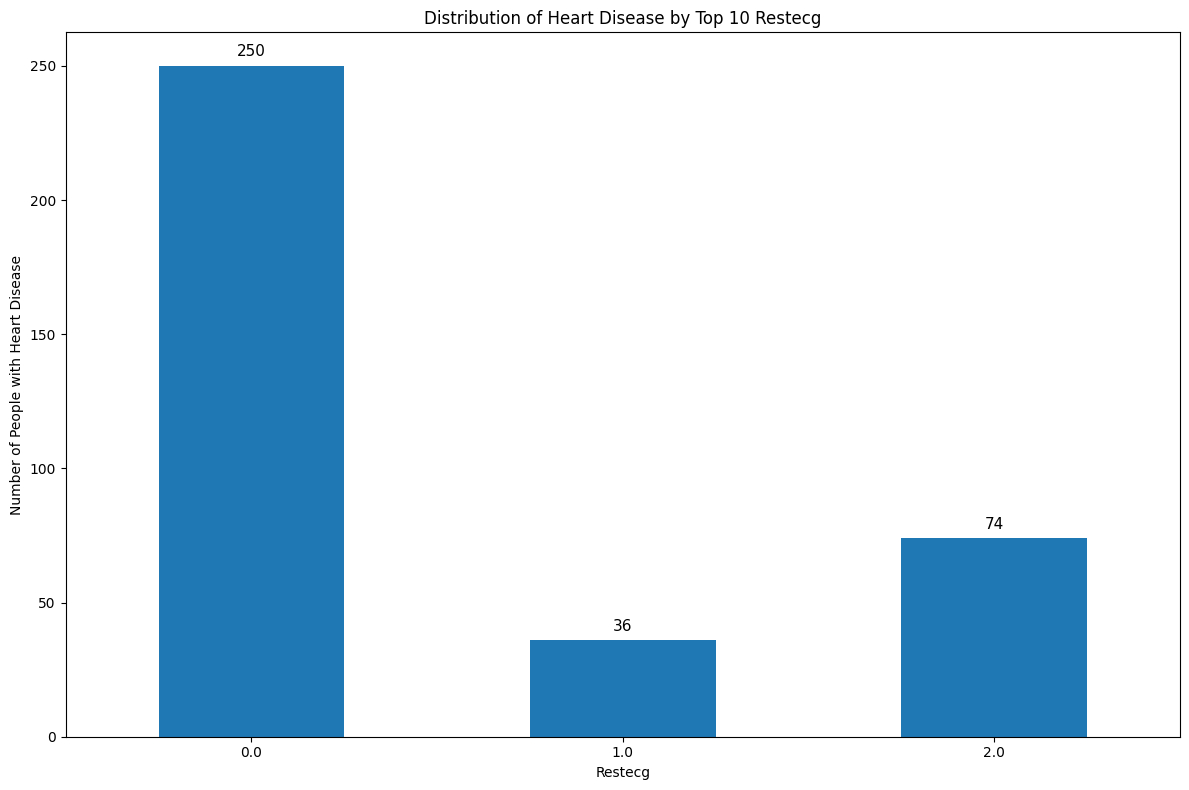

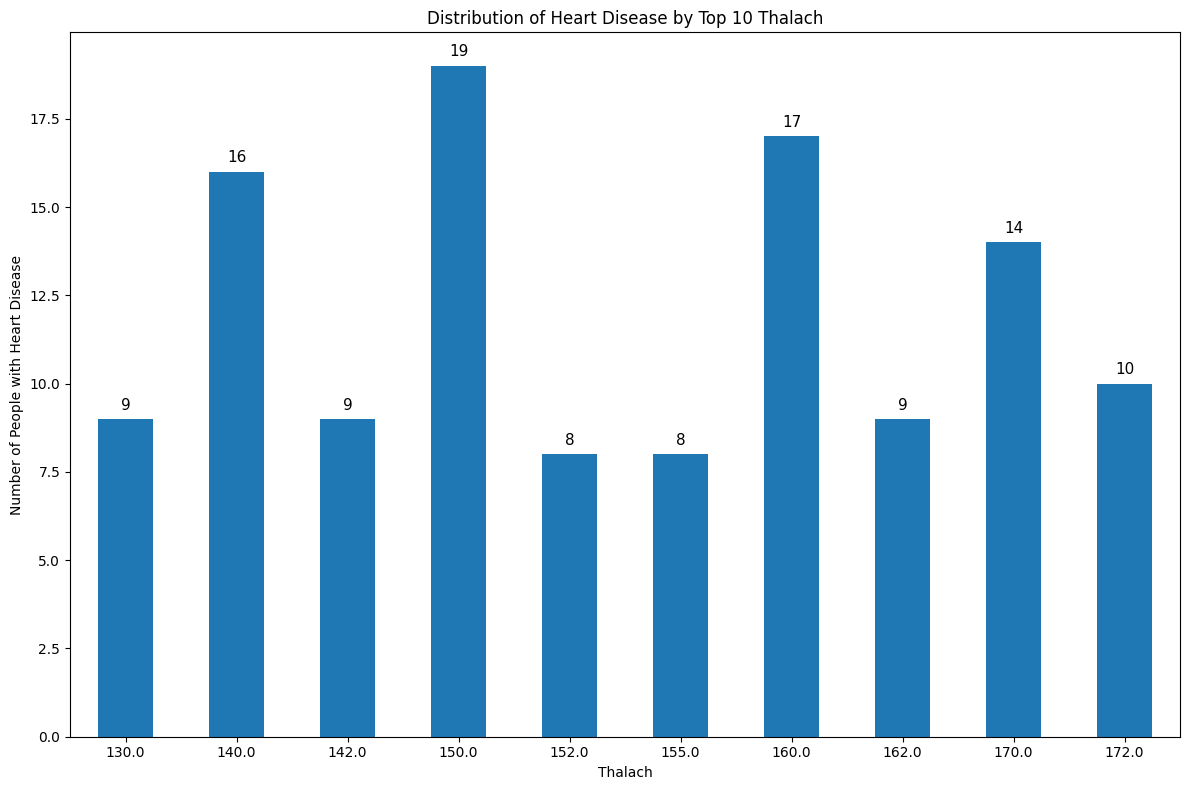

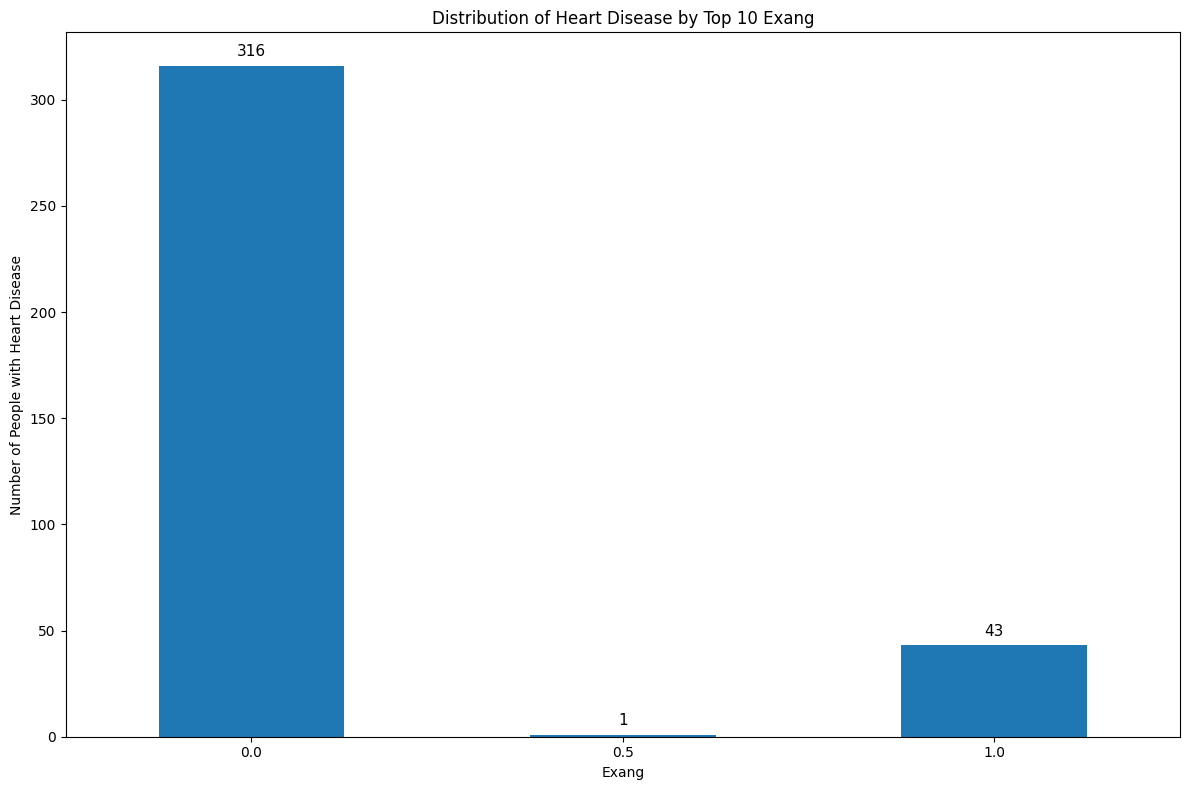

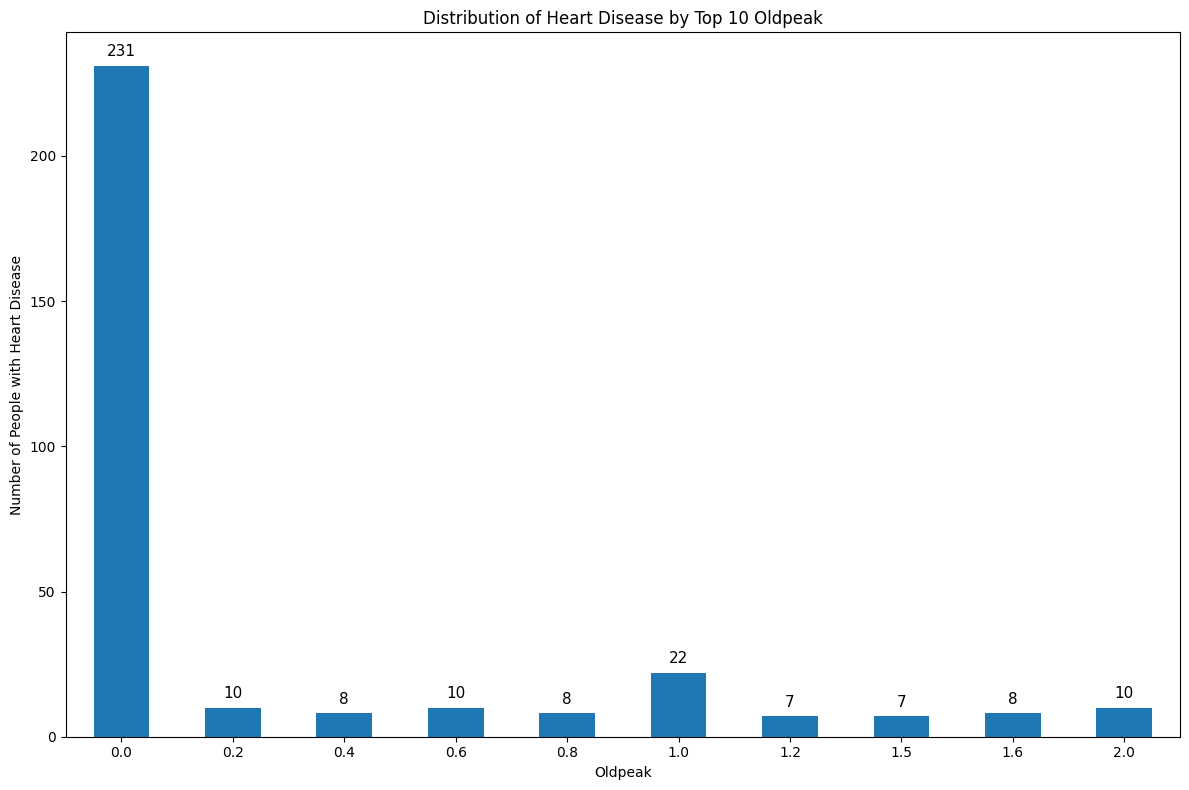

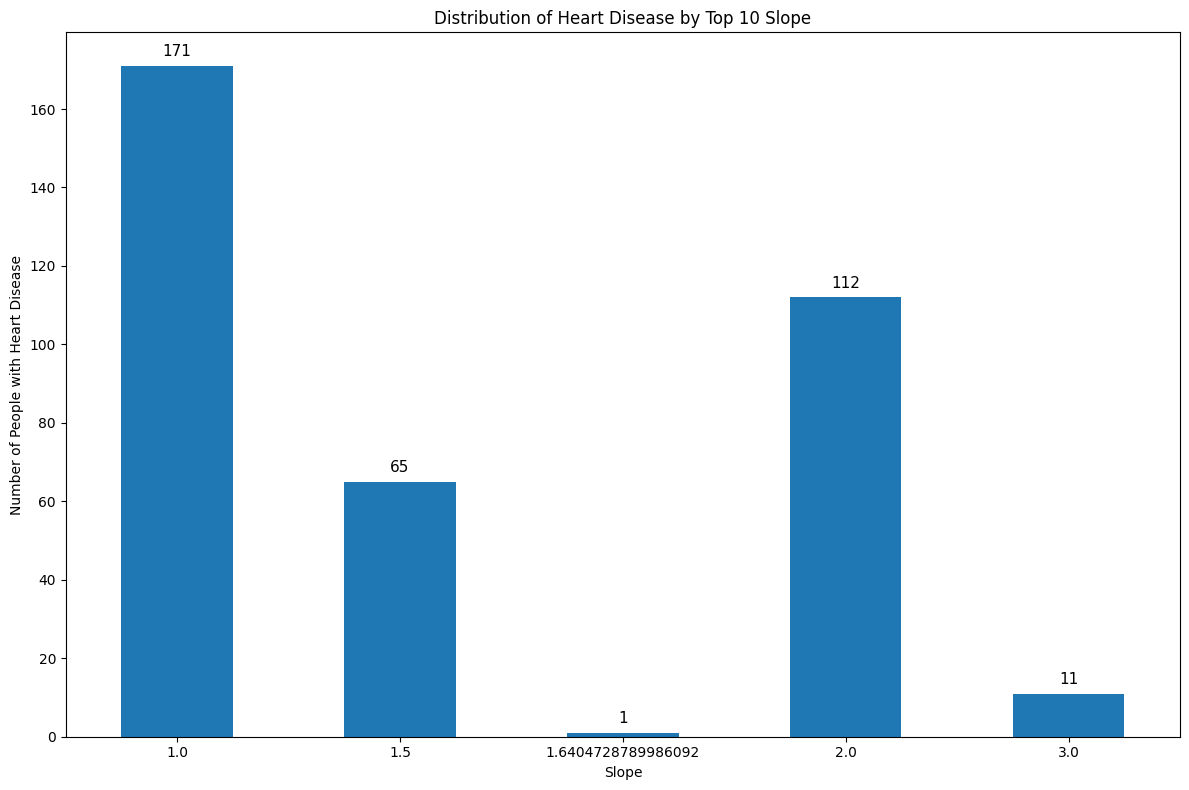

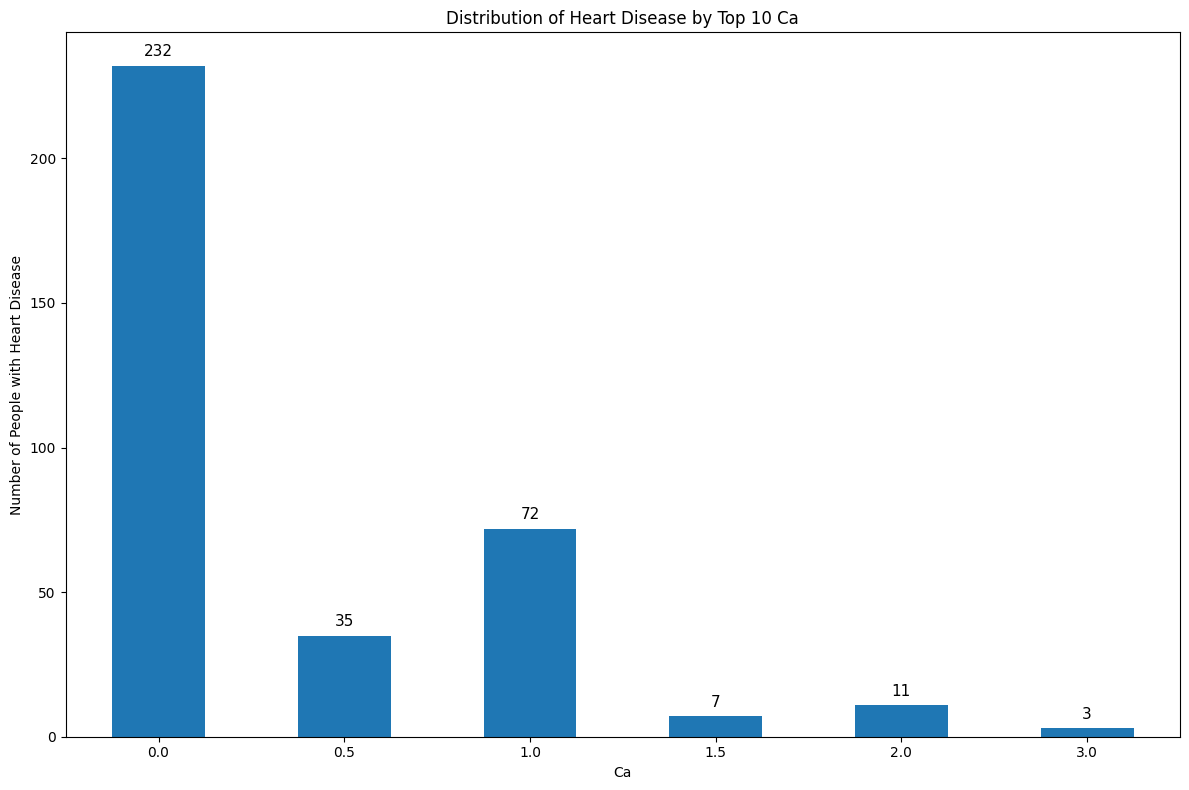

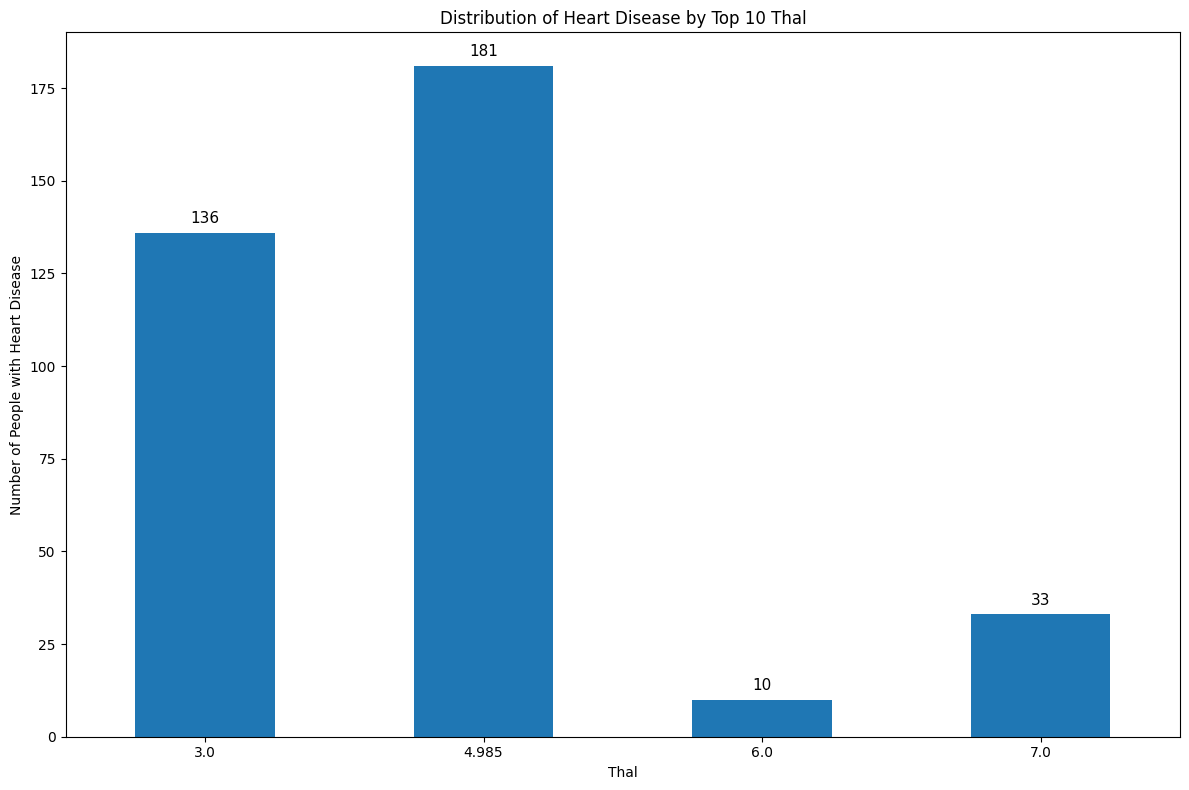

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe
# Example data for demonstration purposes
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset path

# Set cholesterol values of 0 to NaN
df.loc[df['chol'] == 0, 'chol'] = np.nan

# Filter the dataframe for people with heart disease
heart_disease_df = df[df['label_binary'] == 0]

# List of features to plot
features = df.drop(['label', 'label_binary'], axis=1).columns

# Plotting the distribution for each feature
for feature in features:
    # Get the top 10 values for the feature with the highest counts of heart disease
    top_10_values = heart_disease_df[feature].value_counts().head(10).index

    # Filter the dataframe to include only the top 10 values
    top_10_value_df = heart_disease_df[heart_disease_df[feature].isin(top_10_values)]

    # Plot the distribution of heart disease by top 10 values for the feature
    plt.figure(figsize=(12, 8))
    value_counts = top_10_value_df[feature].value_counts().sort_index()
    ax = value_counts.plot(kind='bar', color='#1f77b4')

    # Add counts on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                    textcoords='offset points')

    plt.title(f'Distribution of Heart Disease by Top 10 {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Number of People with Heart Disease')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()


## Average Values of each class

In [ ]:
df_nolabel = df.drop(['label'],axis=1)
binary_class_mean = df_nolabel.groupby('label_binary').mean()
print("Average feature values for binary class:")
binary_class_mean

Average feature values for binary class:


age       sex        cp    trestbps        chol       fbs  \
label_binary                                                                    
0             49.658333  0.608333  2.705556  129.918902  239.574060  0.088889   
1             54.119444  0.869444  3.652778  133.690582  254.354982  0.138889   

               restecg     thalach     exang   oldpeak     slope        ca  \
label_binary                                                                 
0             0.511111  150.898793  0.120833  0.391111  1.464279  0.363889   
1             0.627778  130.232126  0.552778  1.191389  1.816667  0.863889   

                  thal  
label_binary            
0             4.448014  
1             5.521986

In [ ]:
binary_class_min = df_nolabel.groupby('label_binary').min()

print("Minimum feature values for binary class:")
binary_class_min

Minimum feature values for binary class:


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
label_binary                                                                  
0             28.0  0.0  1.0      80.0   85.0  0.0      0.0     90.0    0.0   
1             31.0  0.0  1.0      92.0  117.0  0.0      0.0     60.0    0.0   

              oldpeak  slope   ca  thal  
label_binary                             
0                -1.1    1.0  0.0   3.0  
1                -2.6    1.0  0.0   3.0

In [ ]:
binary_class_max = df.groupby('label_binary').max()

print("Average feature values for binary class:")
binary_class_max

Average feature values for binary class:


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
label_binary                                                                  
0             76.0  1.0  4.0     190.0  564.0  1.0      2.0    202.0    1.0   
1             77.0  1.0  4.0     200.0  603.0  1.0      2.0    195.0    1.0   

              oldpeak  slope   ca  thal  label  
label_binary                                    
0                 4.2    3.0  3.0   7.0      0  
1                 6.2    3.0  3.0   7.0      4

In [ ]:
df_melted = df.melt(id_vars='label_binary', var_name='feature', value_name='value')

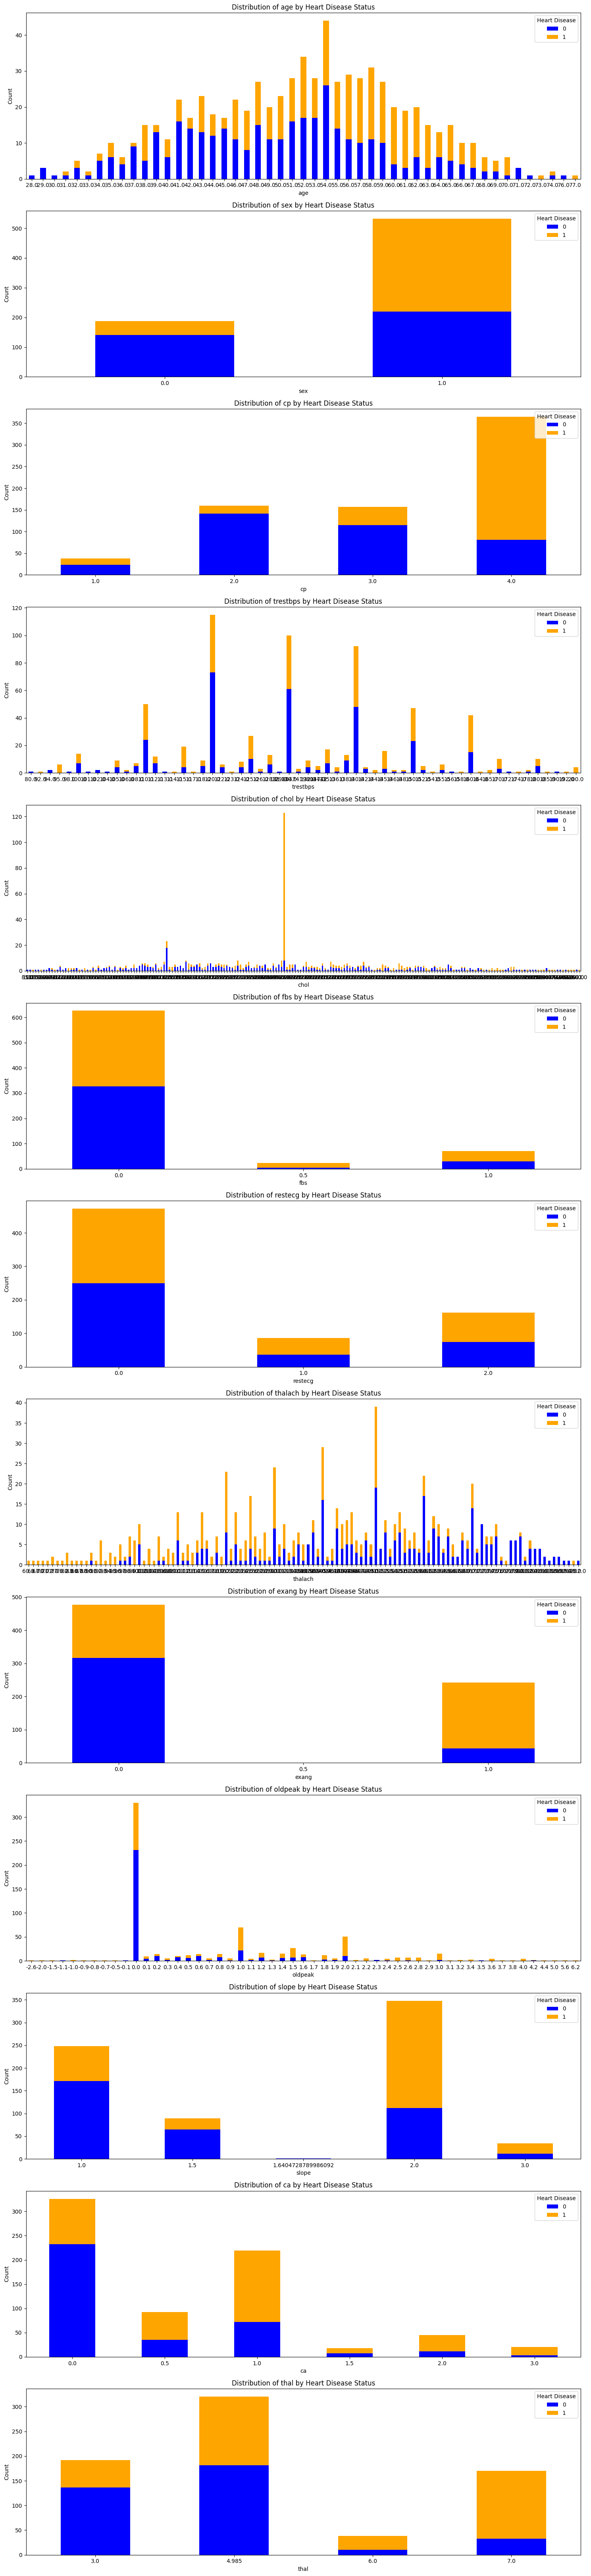

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Calculate the counts for each feature by heart disease status
features = df.drop(['label', 'label_binary'], axis=1).columns

# Create stacked bar plots for each feature
fig, axes = plt.subplots(len(features), 1, figsize=(15, 5 * len(features)))

for i, feature in enumerate(features):
    counts = df.groupby([feature, 'label_binary']).size().unstack().fillna(0)
    counts.plot(kind='bar', stacked=True, ax=axes[i], color=['blue', 'orange'])
    axes[i].set_title(f'Distribution of {feature} by Heart Disease Status')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Heart Disease', loc='upper right')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## How does resting blood pressure vary with age for people with heart disease?

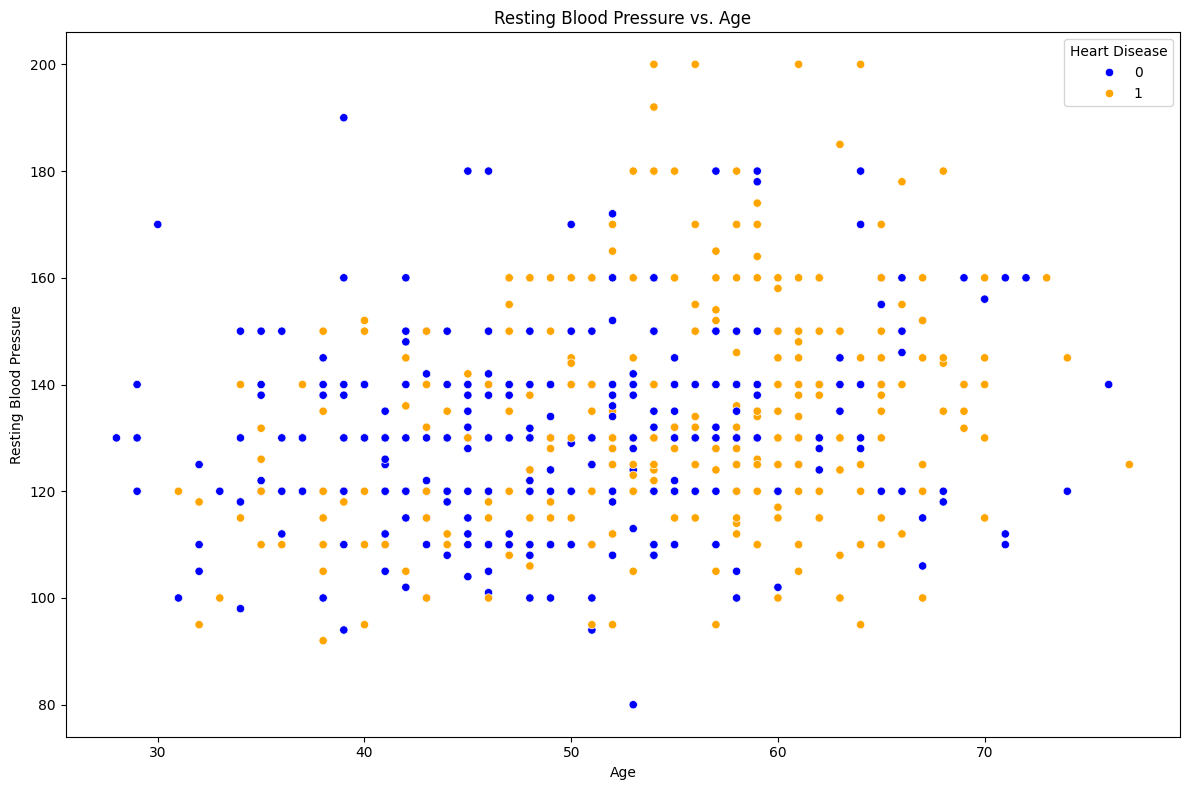

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='trestbps', hue='label_binary', data=df, palette=['blue', 'orange'])
plt.title('Resting Blood Pressure vs. Age')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(title='Heart Disease', loc='upper right')
plt.tight_layout()
plt.show()

## How does the maximum heart rate achieved vary between people with and without heart disease?

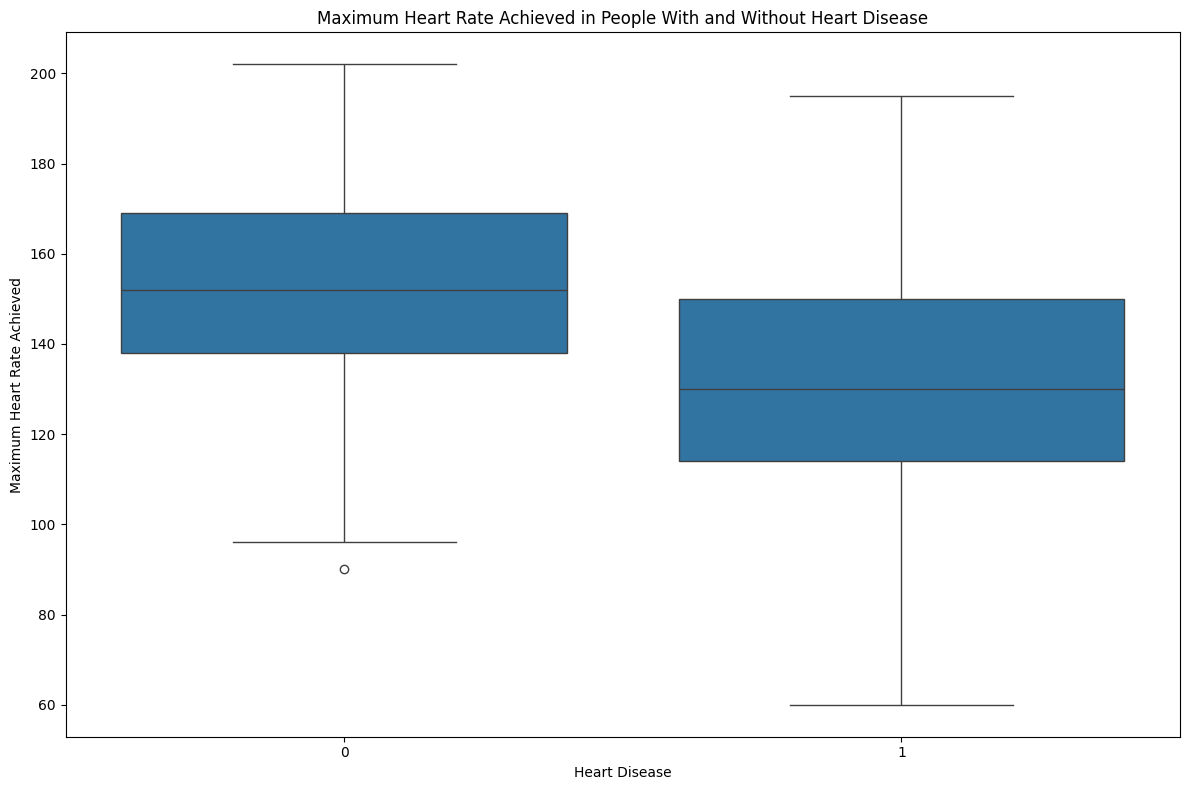

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='label_binary', y='thalach', data=df)
plt.title('Maximum Heart Rate Achieved in People With and Without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate Achieved')
plt.tight_layout()
plt.show()

# Explainable AI with DALEX

In [ ]:
!pip install dalex

In [ ]:
import dalex as dx
# Create DALEX explainer for the ensemble model
explainer_ensemble = dx.Explainer(ensemble, X_train, y_train['label_binary'])

# Model performance
explainer_ensemble.model_performance().result

# Variable importance
explainer_ensemble.model_parts().plot()

Preparation of a new explainer is initiated

  -> data              : 504 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 504 values
  -> model_class       : sklearn.ensemble._voting.VotingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7bf8294ff0a0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0245, mean = 0.486, max = 0.98
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.59, mean = 0.00232, max = 0.611
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
# Partial Dependence Profile for a feature
for col in X.columns:
  explainer_ensemble.model_profile(variables=col).plot()

Calculating ceteris paribus: 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:03<00:00,  3.85s/it]


# Explainable AI with LIME (using input samples)

In [ ]:
!pip install lime

## Setup the data

In [ ]:
# Select random samples from the testing data
# sample_index_yes = np.random.choice(X_test[y_test['label_binary'] == 1].index)
# sample_index_no = np.random.choice(X_test[y_test['label_binary'] == 0].index)

# Get the input samples
input_sample_yes = X_test.loc[192]
input_sample_no = X_test.loc[41]

# Print the selected samples
print("Sample with Heart Disease:\n", input_sample_yes)
print("Sample without Heart Disease:\n", input_sample_no)


Sample with Heart Disease:
 age          61.0
sex           1.0
cp            4.0
trestbps    148.0
chol        203.0
fbs           0.0
restecg       0.0
thalach     161.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            1.0
thal          7.0
Name: 192, dtype: float64
Sample without Heart Disease:
 age          53.000
sex           1.000
cp            4.000
trestbps    130.000
chol        182.000
fbs           0.000
restecg       0.000
thalach     148.000
exang         0.000
oldpeak       0.000
slope         1.000
ca            0.000
thal          4.985
Name: 41, dtype: float64


## Predicting

In [ ]:
# Predict using the ensemble model
prediction_yes = ensemble.predict([input_sample_yes])
prediction_no = ensemble.predict([input_sample_no])

# Print predictions
print("Prediction for sample with heart disease:", "Heart Disease" if prediction_yes[0] == 1 else "No Heart Disease")
print("Prediction for sample without heart disease:", "Heart Disease" if prediction_no[0] == 1 else "No Heart Disease")

Prediction for sample with heart disease: Heart Disease
Prediction for sample without heart disease: No Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



## Explanation using LIME

In [ ]:
pip install lime

In [ ]:
import numpy as np
import lime
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['No Heart Disease', 'Heart Disease'],
    mode='classification'
)

# Explain the prediction for the sample with heart disease
exp_yes = explainer.explain_instance(
    data_row=input_sample_yes,
    predict_fn=ensemble.predict_proba
)

# Explain the prediction for the sample without heart disease
exp_no = explainer.explain_instance(
    data_row=input_sample_no,
    predict_fn=ensemble.predict_proba
)

# Show the explanations
exp_yes.show_in_notebook(show_table=True)
exp_no.show_in_notebook(show_table=True)

# Optional: Save the explanations as HTML files
exp_yes.save_to_file('lime_explanation_yes.html')
exp_no.save_to_file('lime_explanation_no.html')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

